# **Portafolio de análisis**

Francisco Mestizo Hernández A01731549

## **Exploración y preparación de los datos**

Incluimos las librerias necesarias para la actividad

In [ ]:
install.packages("dplyr")
install.packages("tidyr")

library(dplyr)
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Comenzamos importando los datos del archivo de autos con el que vamos a trabajar

In [ ]:
#Leemos los datos del csv (No los imprimo porque ocupan mucho espacio en la pantalla)
M = read.csv('/content/sample_data/precios_autos.csv')
head(M)
#Hay que recordar poner el csv en los archivos del colab

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,⋯,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,⋯,dohc,four,130,2.68,9.0,111,5000,21,27,13495
2,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,⋯,dohc,four,130,2.68,9.0,111,5000,21,27,16500
3,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,⋯,ohcv,six,152,3.47,9.0,154,5000,19,26,16500
4,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,⋯,ohc,four,109,3.40,10.0,102,5500,24,30,13950
5,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,⋯,ohc,five,136,3.40,8.0,115,5500,18,22,17450
6,2,audi fox,gas,sedan,fwd,front,99.8,177.3,66.3,53.1,⋯,ohc,five,136,3.40,8.5,110,5500,19,25,15250


Ahora que tenemos los datos, podemos verificar si existen datos faltantes, marcados como nulos en el dataframe.

In [ ]:
# Count missing values in each column
missing_counts <- colSums(is.na(M))
print(missing_counts)


       symboling          CarName         fueltype          carbody 
               0                0                0                0 
      drivewheel   enginelocation        wheelbase        carlength 
               0                0                0                0 
        carwidth        carheight       curbweight       enginetype 
               0                0                0                0 
  cylindernumber       enginesize           stroke compressionratio 
               0                0                0                0 
      horsepower          peakrpm          citympg       highwaympg 
               0                0                0                0 
           price 
               0 


Como podemos ver, no hay ninguna columna que le falten datos. Podemos continuar con el análisis de las variables cualitativas y las cuantitativas

### Análisis de variables cuantitativas

Viendo el archivo de excel, podemos ver qué columnas incluyen valores cuantitativos (números). Estas variables son:

* Wheelbase
* Carlength
* Carwidth
* Car height
* Curbweight
* Enginesize
* Stroke
* Compressionratio
* Horsepower
* Peakrpm
* Citympg
* Highwaympg
* Price (Variable dependiente)

En esta sección se mostraran valores y gráficas para cada columna cuantitativa, pero no se dará una descripción especifica de cada variable, simplemente se explicara qué tecnicas se están utilizando y para qué.

Al seleccionar las variables cuantitativas, se dará una explicación de porque se eligieron, basado en los datos mostrados en esta sección.

Primero, para el analisis comenzamos imprimiendo la desviación estandar de cada variable, el valor mínimo, el máximo, los cuartiles, la media y la mediana. Por el momento estos datos no nos dan muchas pistas sobre las variables.

Solamente la desviación estandar nos puede dar una idea de que tan separados estan los datos de la media.

In [ ]:
variables = c('wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg')
for(variable in variables){
  cat(variable, "\n")
  x = M[,variable]
  cat("Desviación estándar: ", sd(x), "\n")
  print(summary(x))
  cat("\n\n")
}


wheelbase 
Desviación estándar:  6.021776 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  86.60   94.50   97.00   98.76  102.40  120.90 


carlength 
Desviación estándar:  12.33729 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  141.1   166.3   173.2   174.0   183.1   208.1 


carwidth 
Desviación estándar:  2.145204 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  60.30   64.10   65.50   65.91   66.90   72.30 


carheight 
Desviación estándar:  2.443522 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.80   52.00   54.10   53.72   55.50   59.80 


curbweight 
Desviación estándar:  520.6802 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1488    2145    2414    2556    2935    4066 


enginesize 
Desviación estándar:  41.64269 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   61.0    97.0   120.0   126.9   141.0   326.0 


stroke 
Desviación estándar:  0.313597 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.070   3.110   3.290   3.255   3.410   4.170 


c

Ahora, podemos generar un histograma para ver la distribución de los datos, así como un diagrama de caja y bigotes para cada variable. Lo que trataremos de obrservar aquí es si los datos se comportan de forma normal o no.

El diagrama de caja y bigote nos ayuda a ver valores outliers, después de la linea roja (más lejos de 1.5 desviaciones estandar) o valores extremos, después de la linea azul (más lejos de 3 desviaciones estandar).

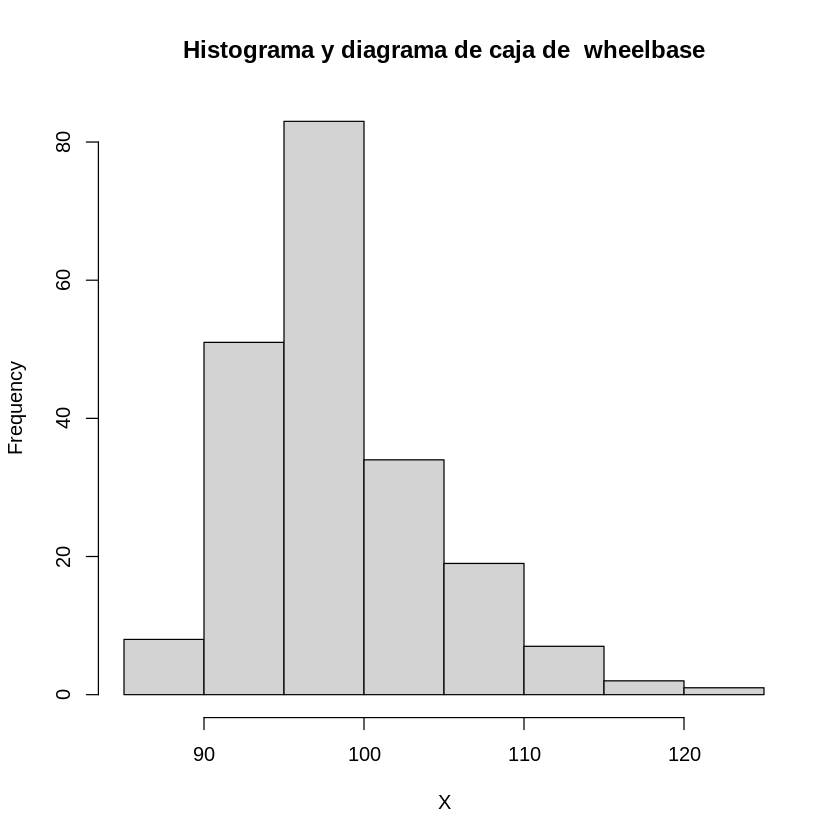

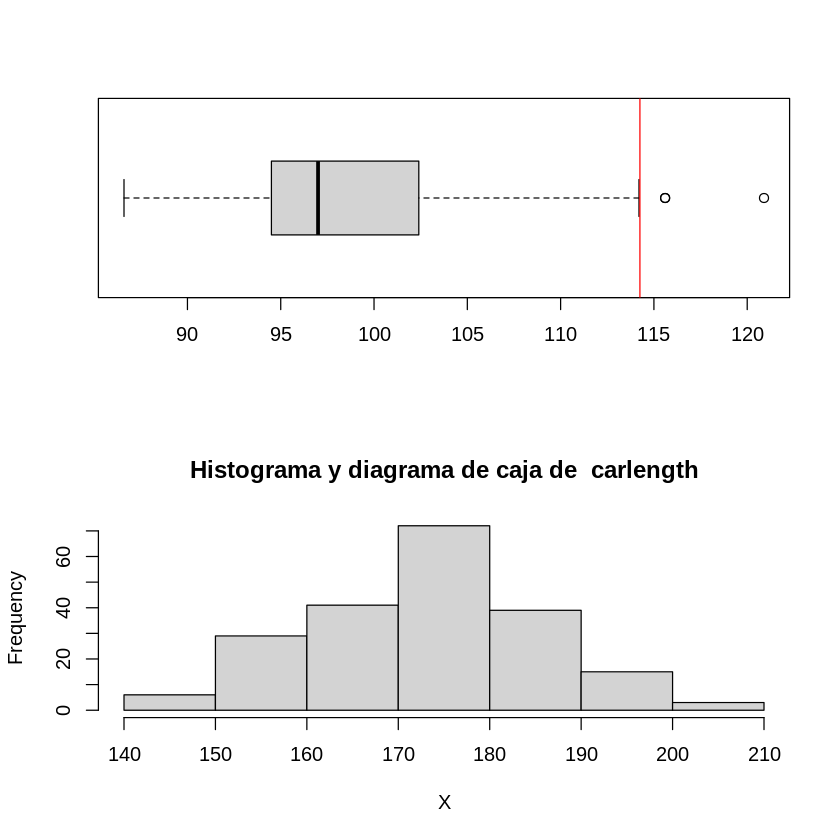

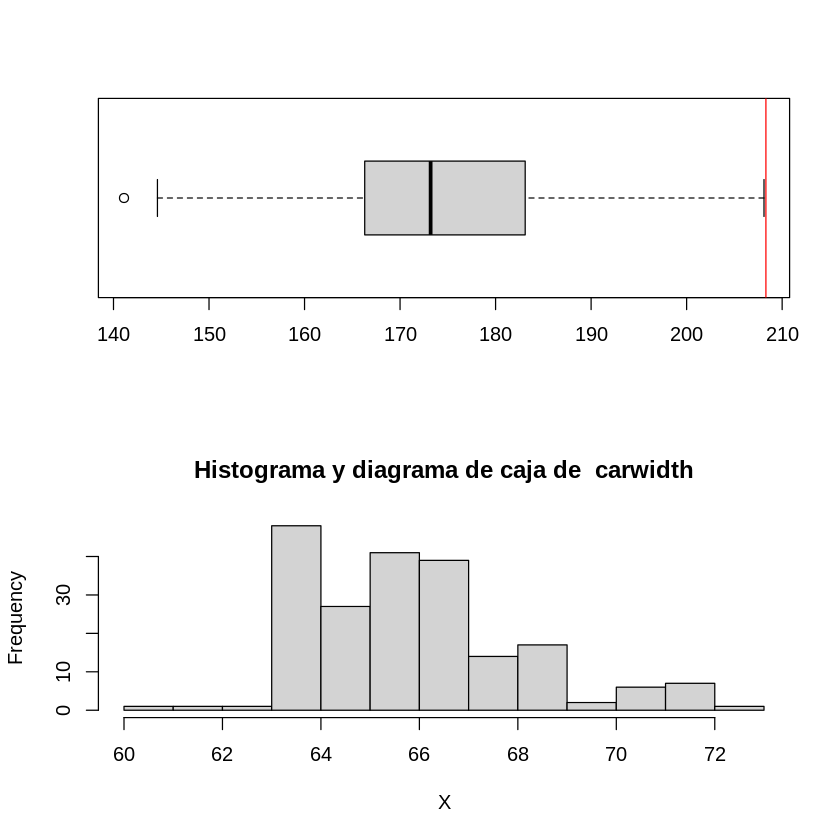

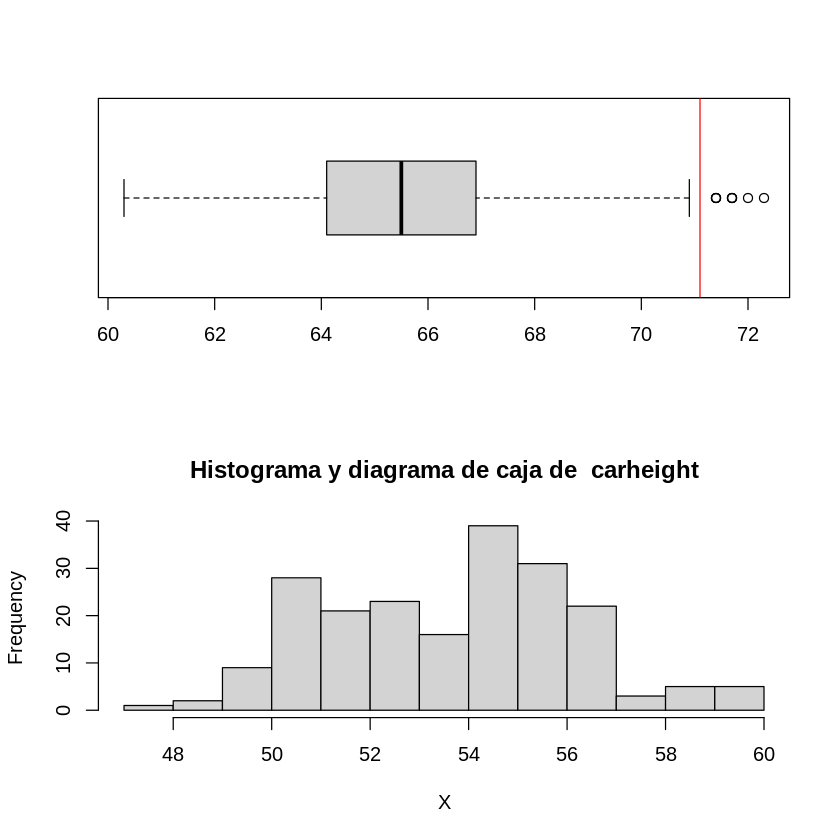

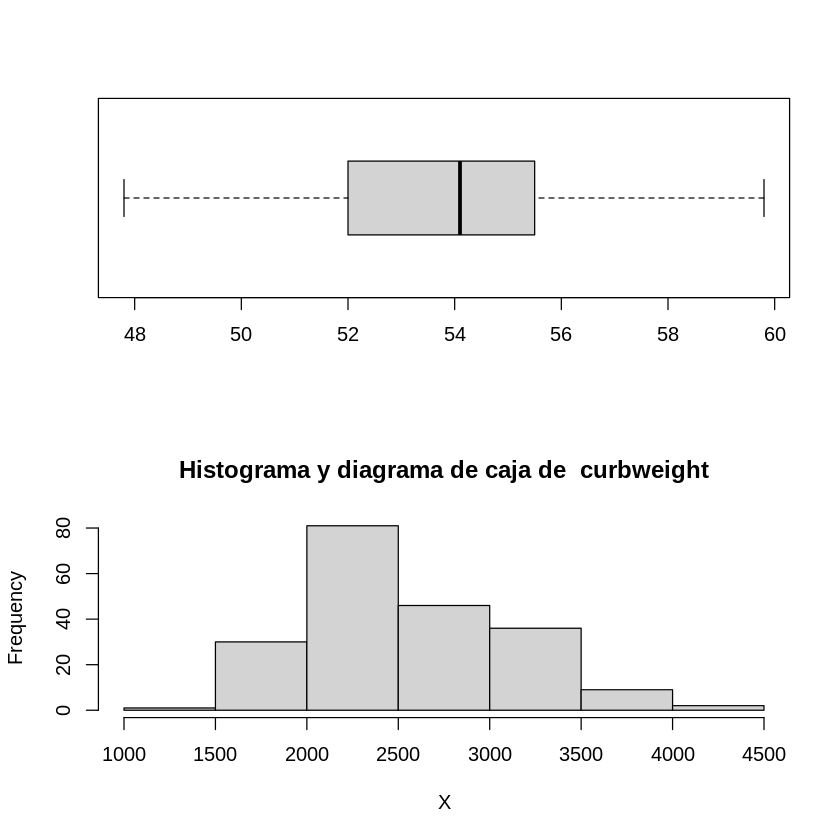

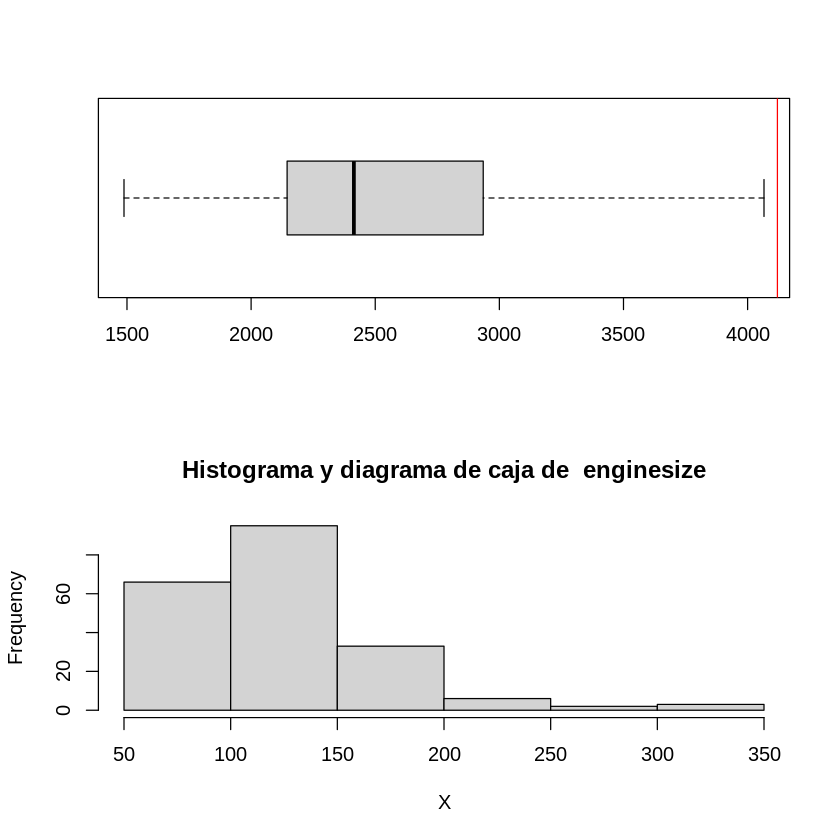

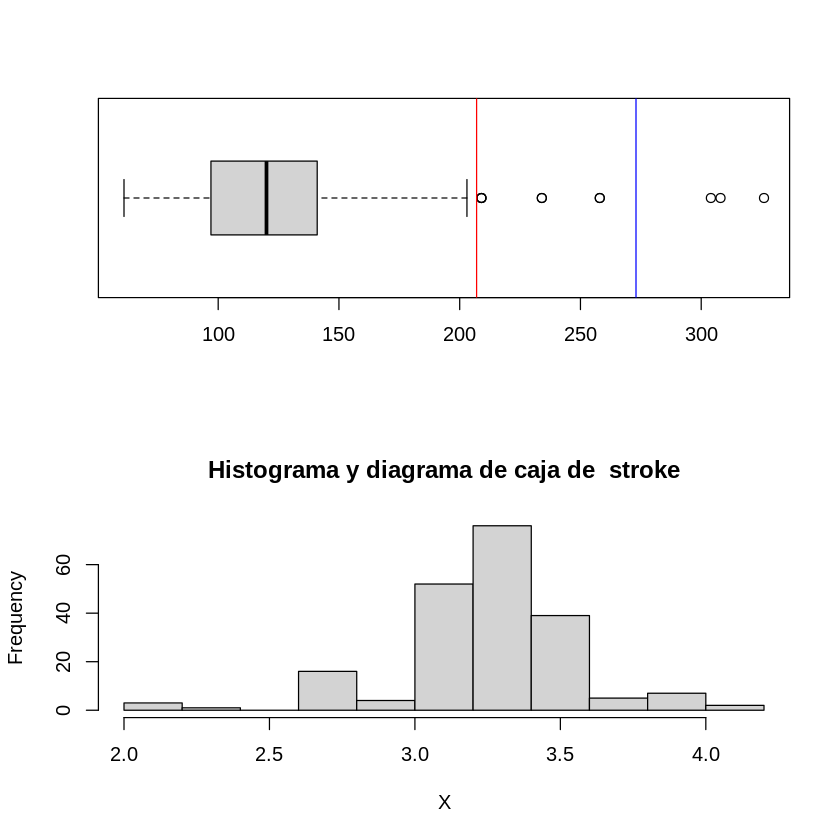

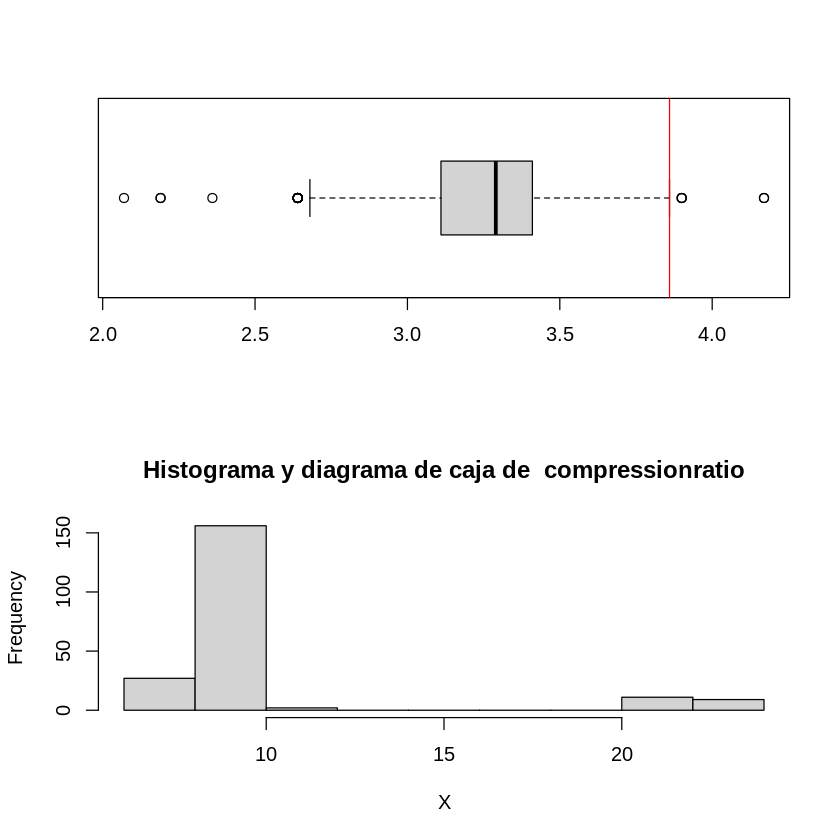

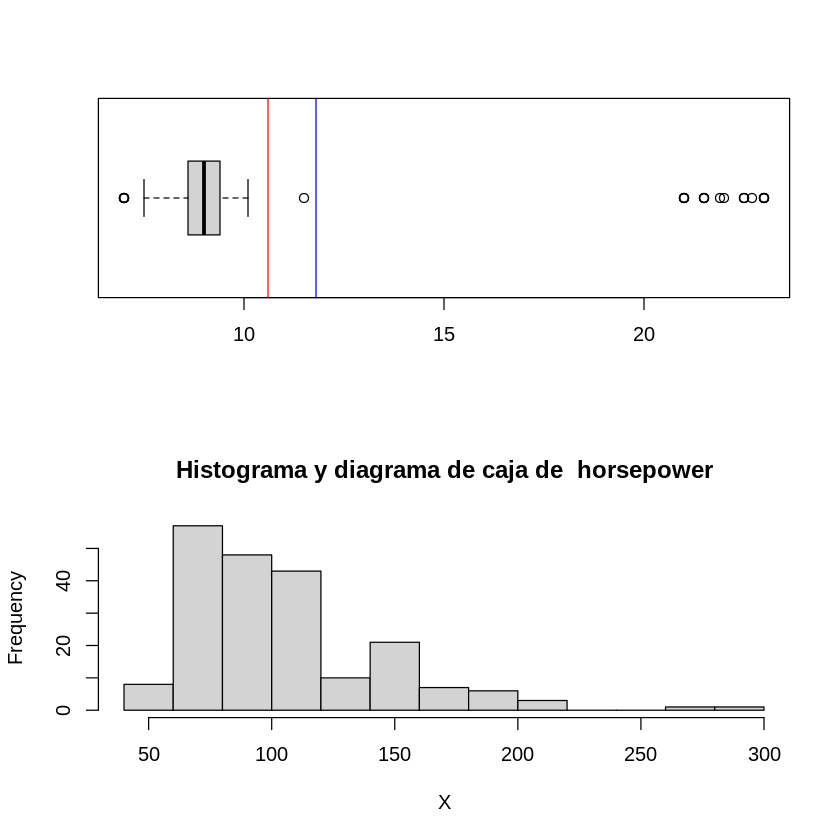

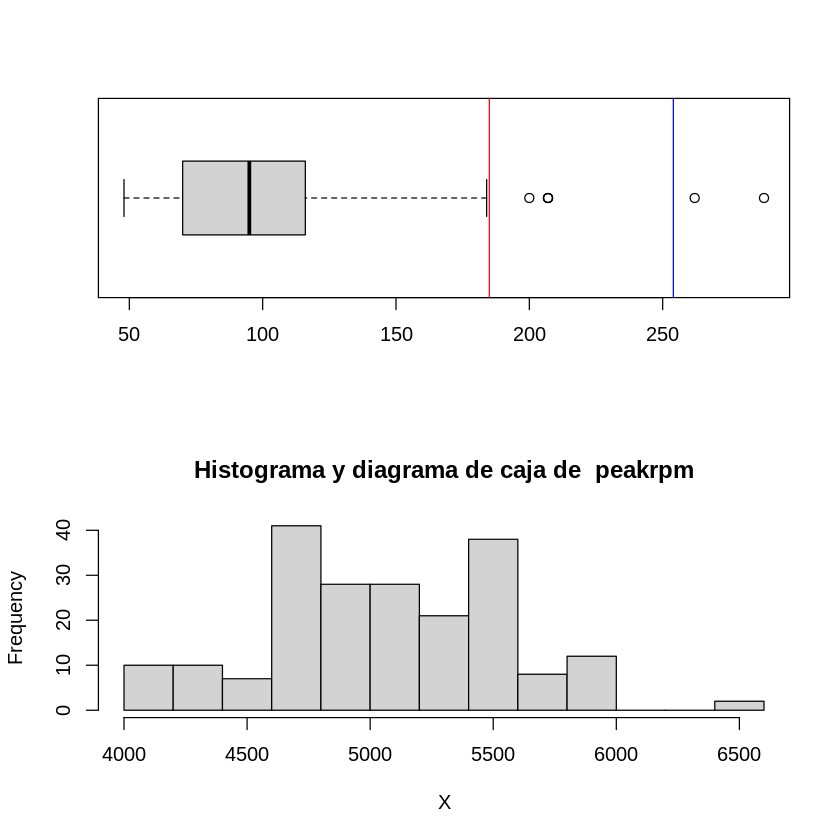

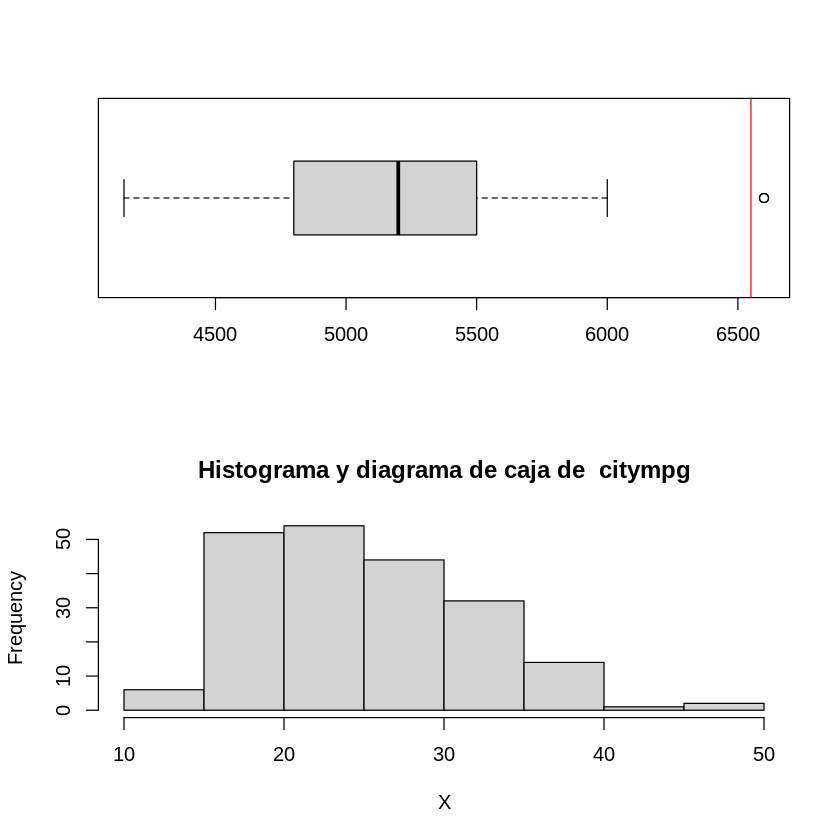

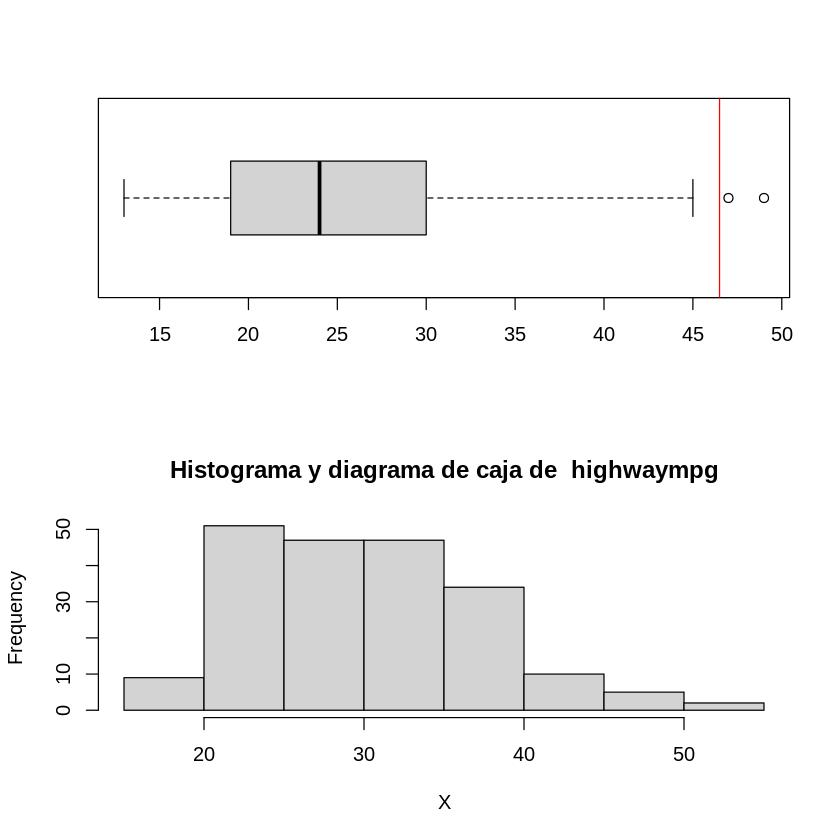

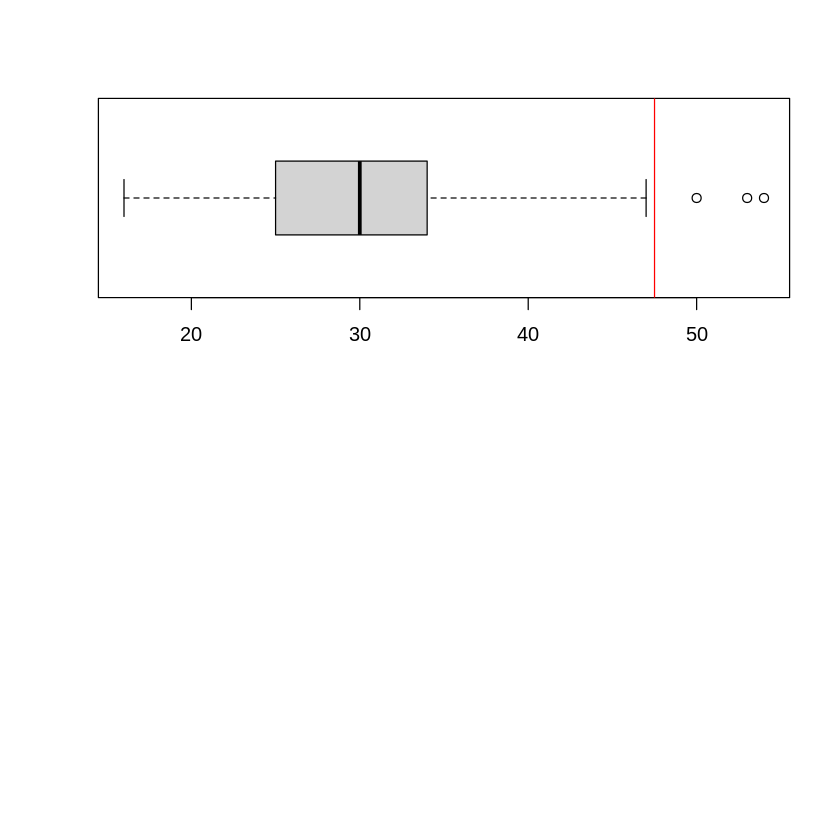

In [ ]:
variables = c('wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg')
outliers <- c()
for(variable in variables){
  X = M[,variable]
  hist(X, main = paste("Histograma y diagrama de caja de ", variable))
  q1=quantile(X,0.25)  #Cuantil 1 de la variable X
  q3=quantile(X,0.75)  #Cuartil 3 de la variable X
  ri= q3-q1             #Rango intercuartílico de X
  par(mfrow=c(2,1))  #Matriz de gráficos de 2x1
  boxplot(X,horizontal=TRUE)
  outliers <- c(outliers, length(boxplot.stats(X)$out))
  Sys.sleep(0.5)
  abline(v=q3+1.5*ri,col="red")  #linea vertical en el límite de los datos atípicos
  abline(v=q3+3*ri,col="blue") #linea vertical que marca os extremos
}


Aunque tenemos los diagramas de caja y bigote, es dificil ver los outliers solo por los puntitos. Por esto, imprimimos cuantos potenciales valores outliers tiene cada variable.

In [ ]:
i = 1
for (variable in variables){
  cat("Posibles outliers para ", variable, ": ", outliers[i], "\n")
  i <- i + 1
}

Posibles outliers para  wheelbase :  3 
Posibles outliers para  carlength :  1 
Posibles outliers para  carwidth :  8 
Posibles outliers para  carheight :  0 
Posibles outliers para  curbweight :  0 
Posibles outliers para  enginesize :  10 
Posibles outliers para  stroke :  20 
Posibles outliers para  compressionratio :  28 
Posibles outliers para  horsepower :  6 
Posibles outliers para  peakrpm :  2 
Posibles outliers para  citympg :  2 
Posibles outliers para  highwaympg :  3 


Para considerar una variable para el análisis final, es importante saber si se relaciona con la variable de salida (precio). Se muestran numeros que van del -1 al 1. Si tomamos el valor absoluto de estos, entre más se acerquen al 1, quiere decir que tienen una correlación más alta con el precio. El signo nos dice si la correlación es descendiente (negativa) o ascendente (positiva).

In [ ]:
Y = M$price
variables = c('wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg')
for(variable in variables){
  X = M[,variable]
  correlation_coefficient <- cor(X, Y)
  cat(paste("Coeficiente de correlación para ", variable, ": ", correlation_coefficient), "\n")
}

Coeficiente de correlación para  wheelbase :  0.57781559829215 
Coeficiente de correlación para  carlength :  0.682920015677962 
Coeficiente de correlación para  carwidth :  0.759325299741511 
Coeficiente de correlación para  carheight :  0.119336226570494 
Coeficiente de correlación para  curbweight :  0.835304879337296 
Coeficiente de correlación para  enginesize :  0.874144802524512 
Coeficiente de correlación para  stroke :  0.079443083881931 
Coeficiente de correlación para  compressionratio :  0.0679835057994427 
Coeficiente de correlación para  horsepower :  0.808138822536222 
Coeficiente de correlación para  peakrpm :  -0.0852671502778569 
Coeficiente de correlación para  citympg :  -0.68575133602704 
Coeficiente de correlación para  highwaympg :  -0.697599091646557 


Para sustentar estos coeficientes de correlación con gráficas, podemos hacer scatter plots para cada variable.

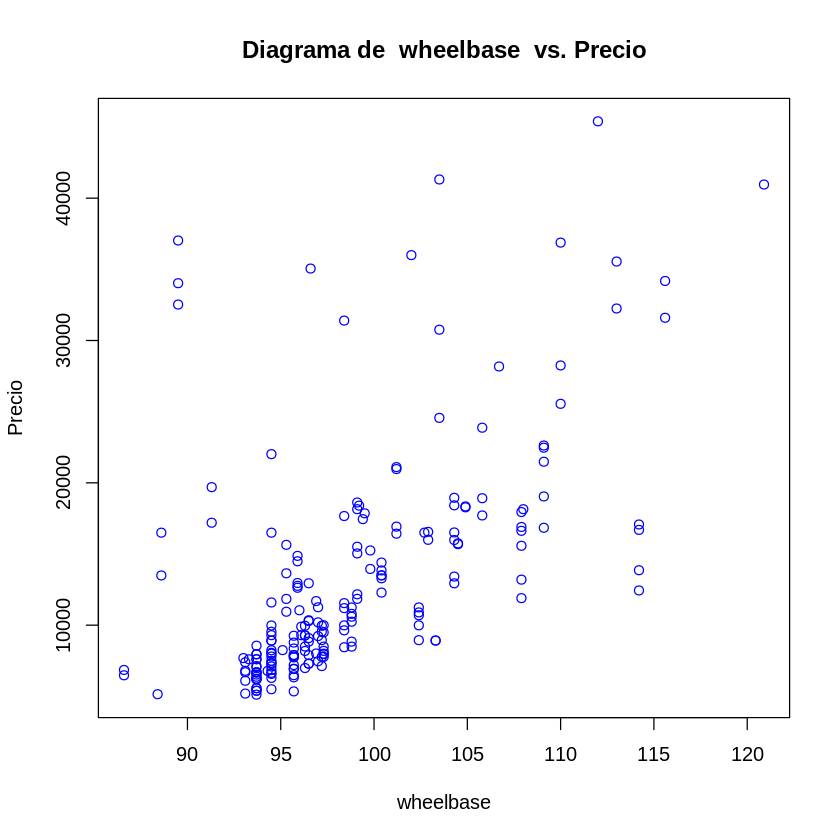

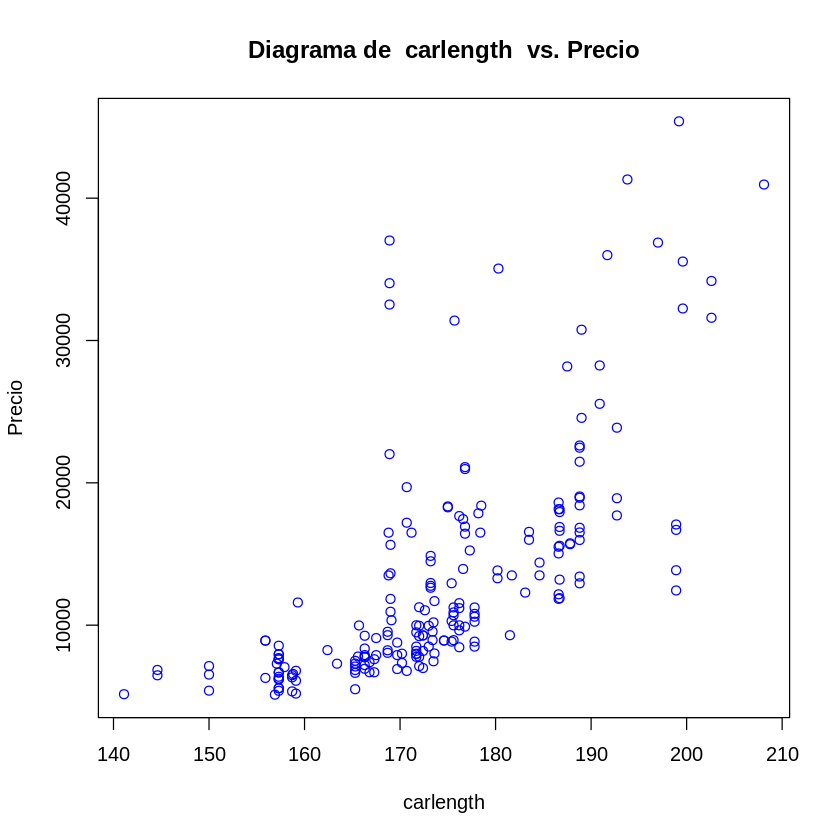

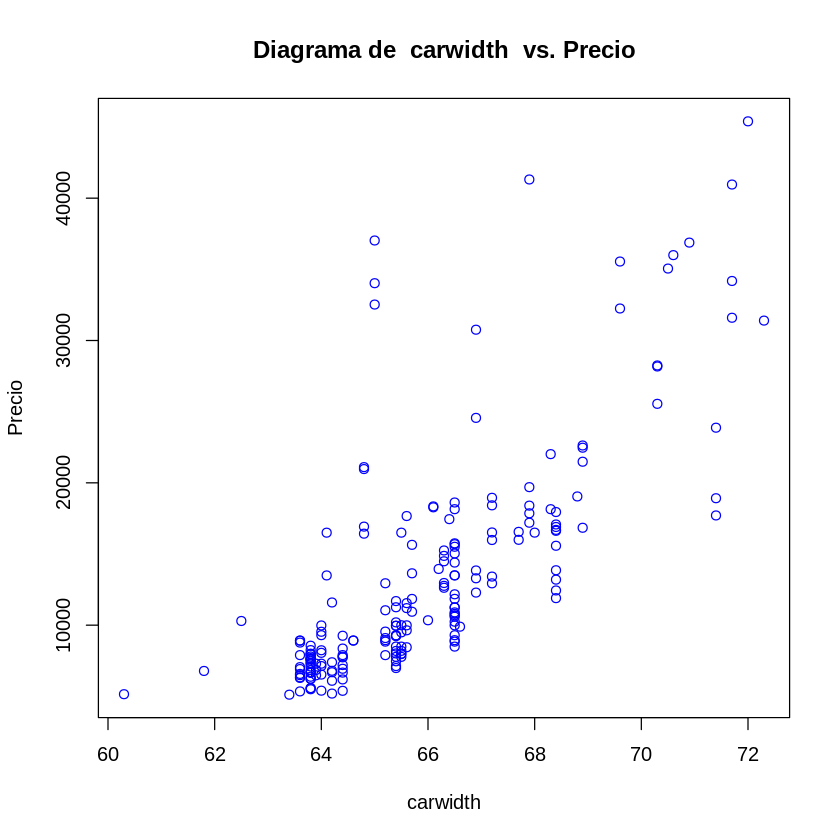

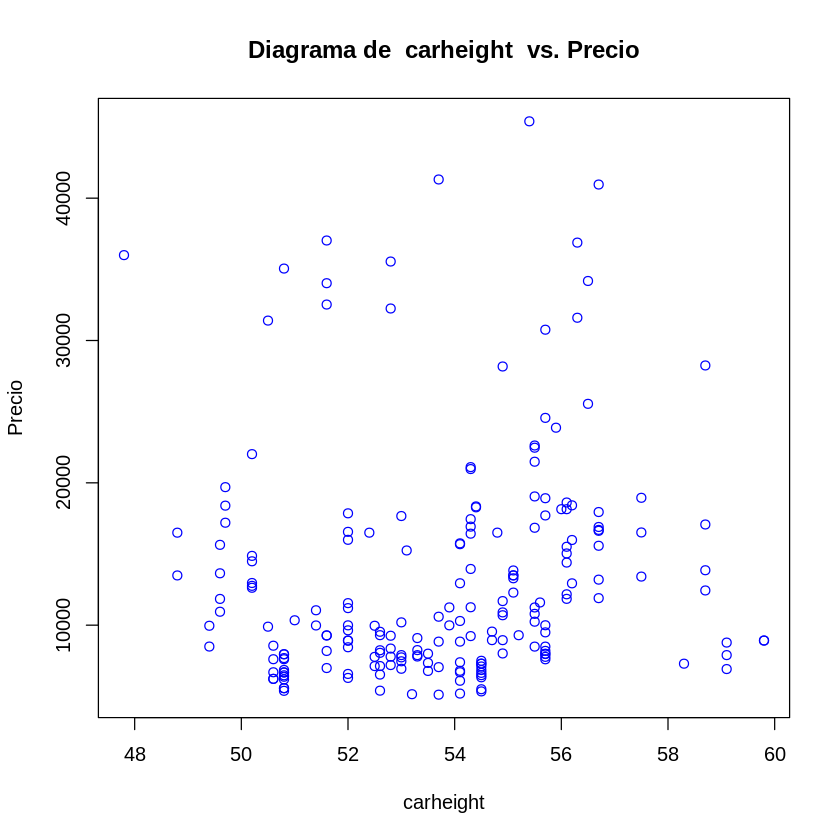

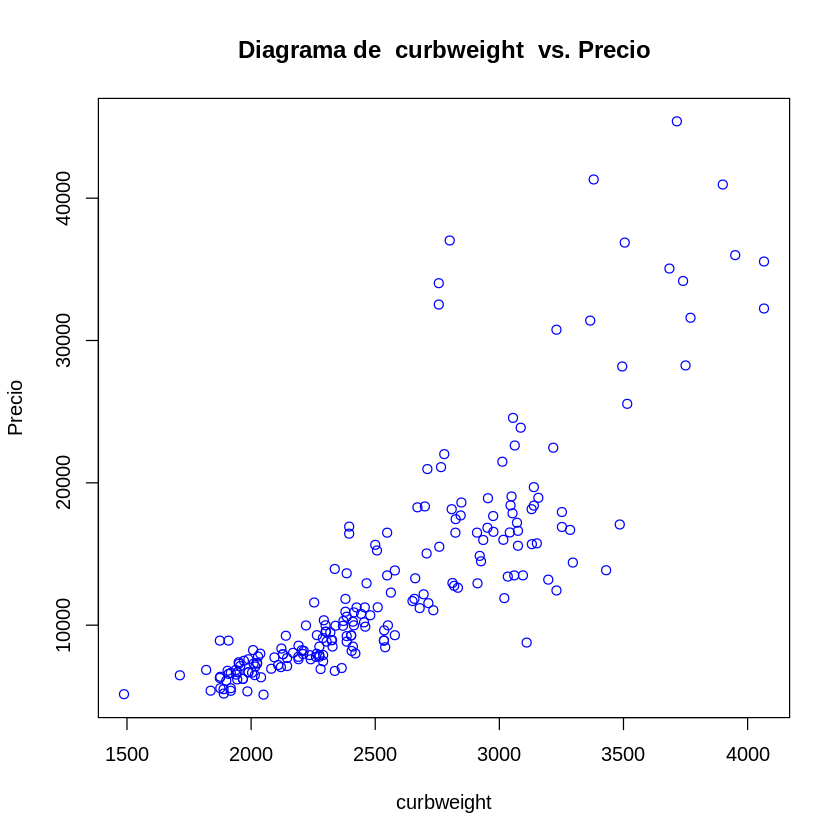

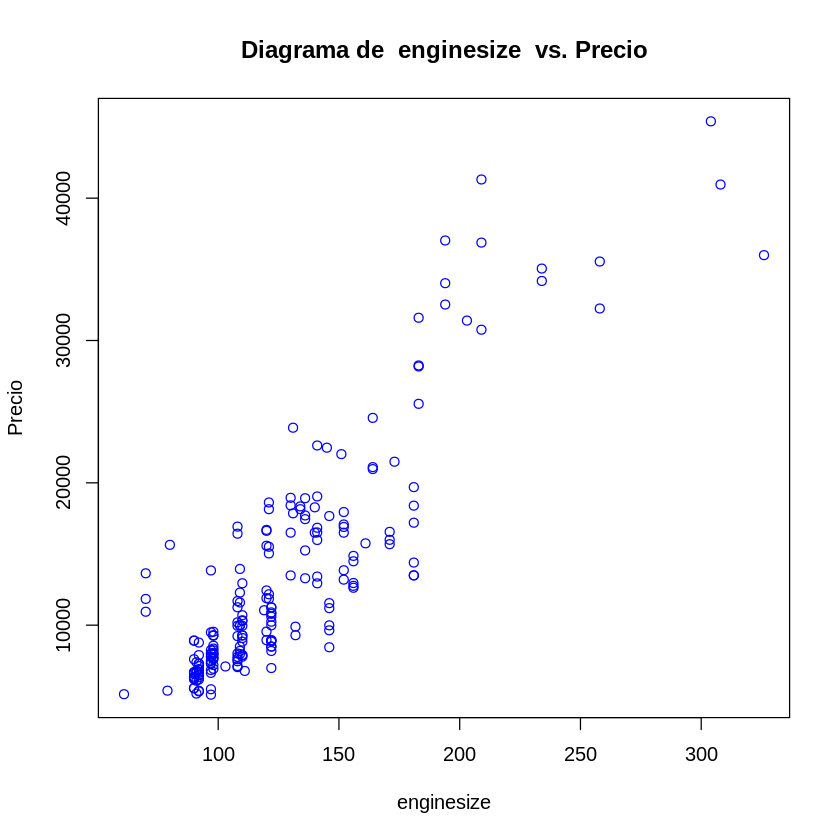

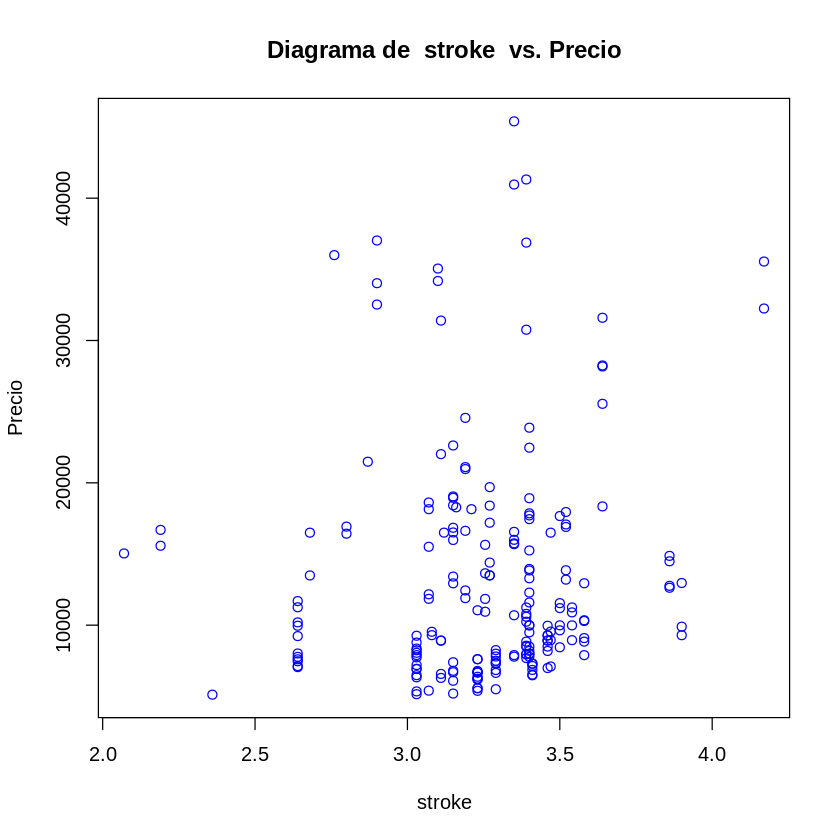

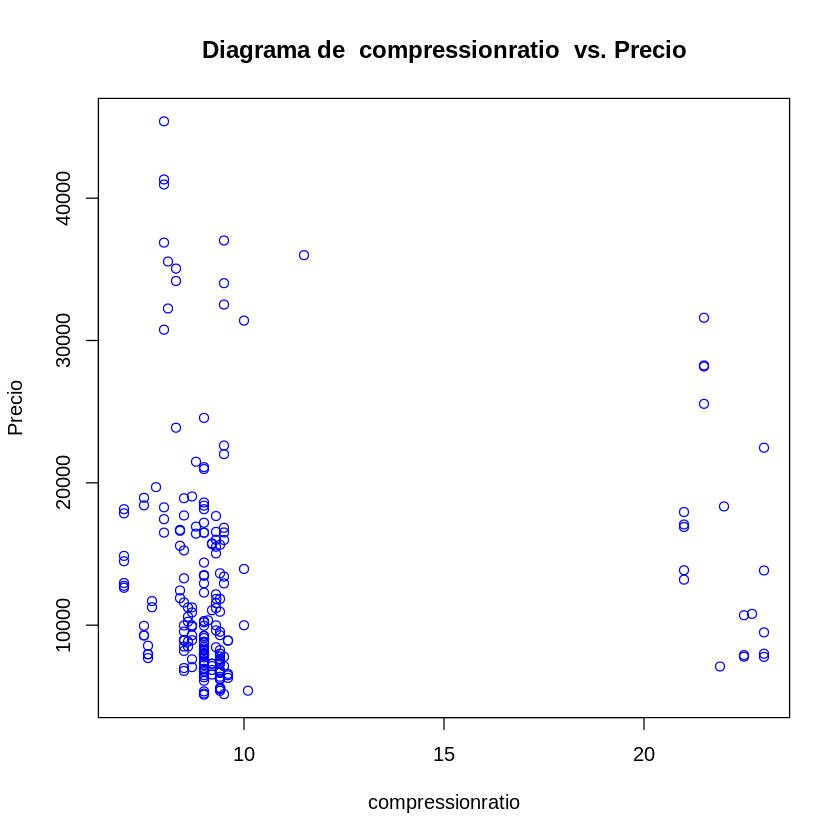

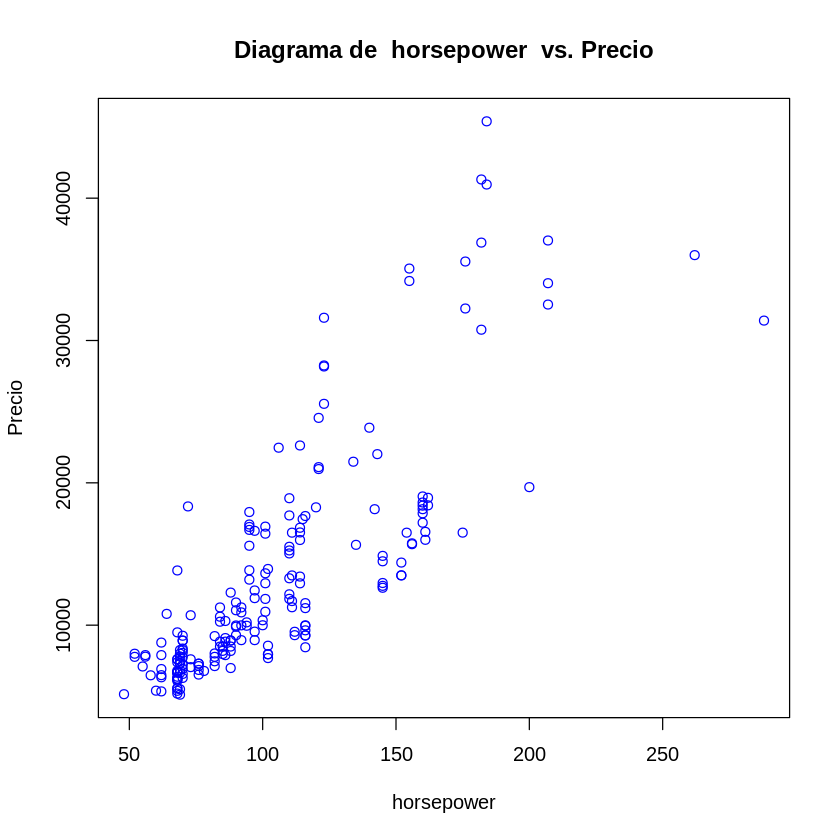

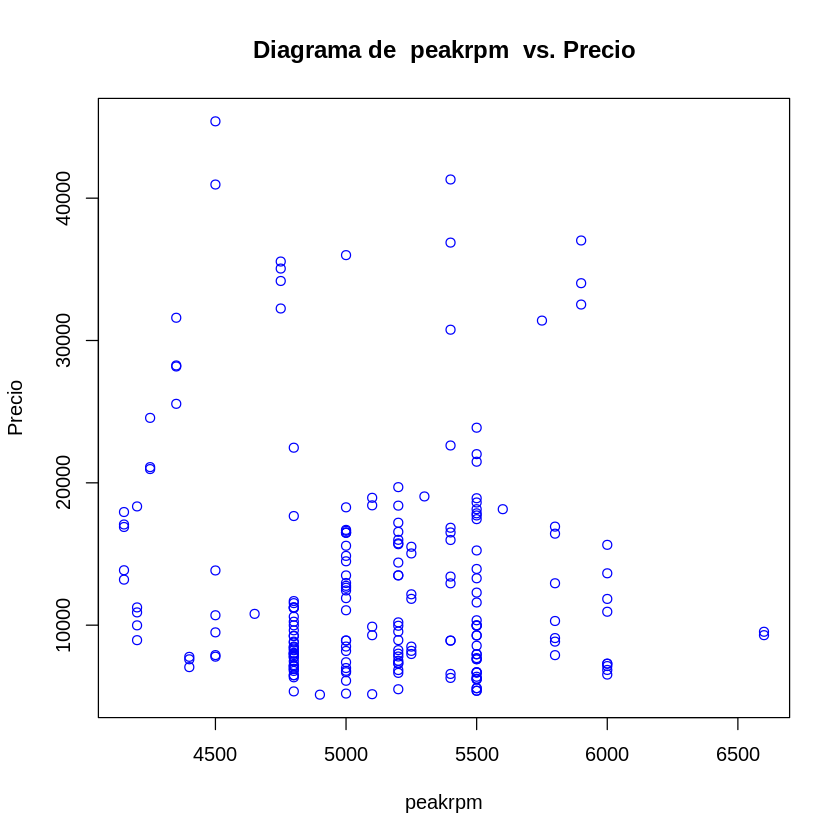

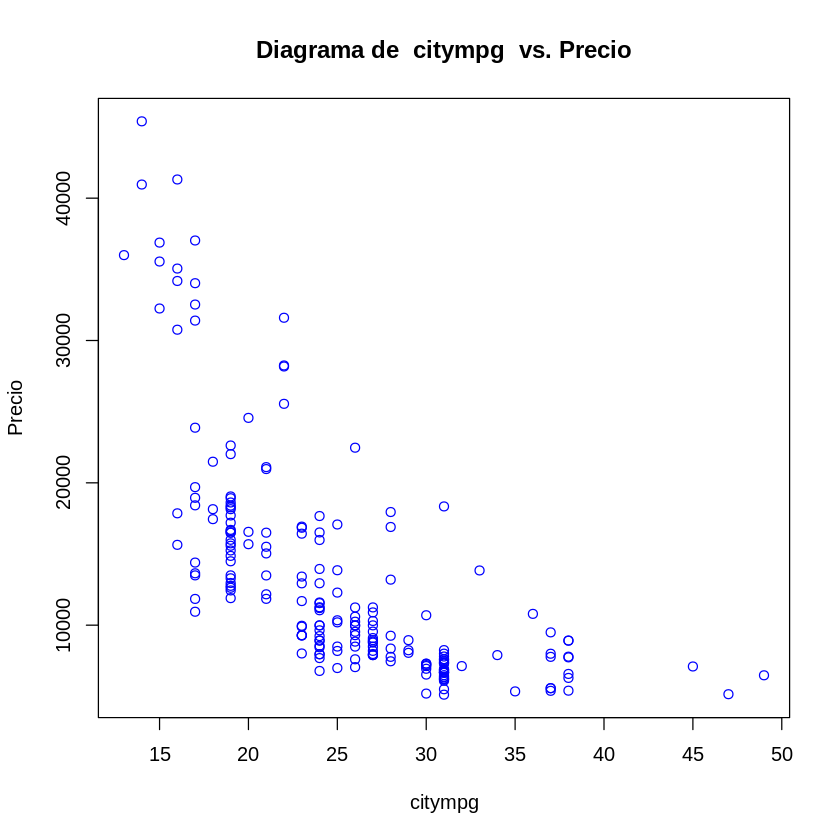

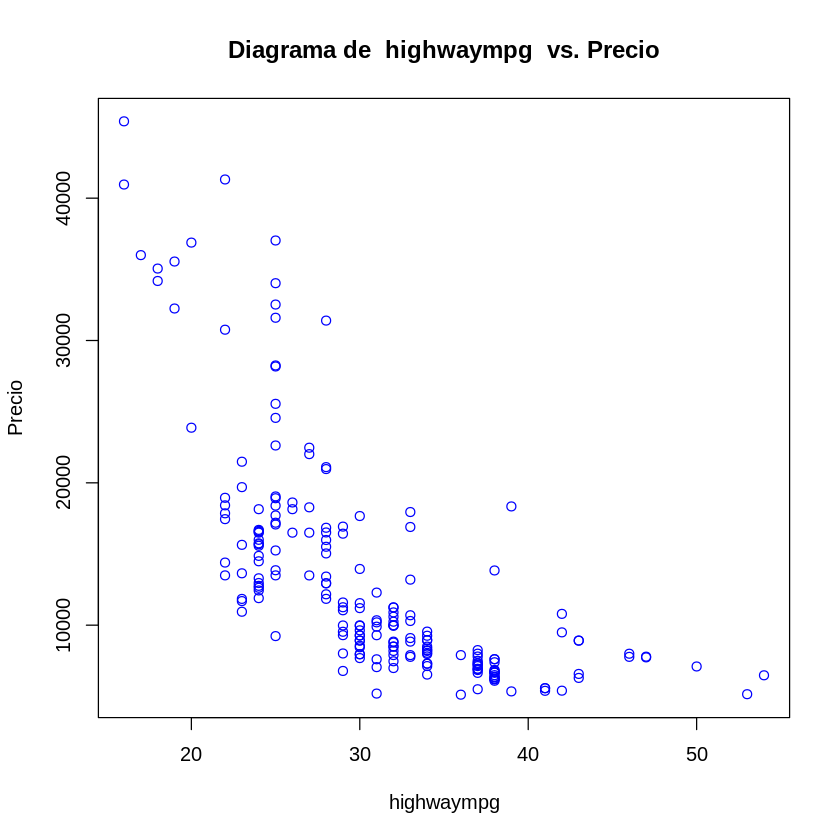

In [ ]:
Y = M$price
variables = c('wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg')
for(variable in variables){
  X = M[,variable]
  correlation_coefficient <- cor(X, Y)
  paste("Coeficiente de correlación para ", variable, ": ", correlation_coefficient)
  plot(X, Y, main = paste("Diagrama de ", variable, " vs. Precio"), xlab = variable, ylab = "Precio", col = "blue")
}



### Análisis de variables cualitativas

Por otro lado tenemos las variables categóricas o cualitativas, estas son:

* Symboling
* Carname
* Fueltype
* Carbody
* Drivewheel
* Enginelocation
* Enginetype
* Cylindernumber

En esta sección se mostraran valores y gráficas para cada columna cualitativa, pero no se dará una descripción especifica de cada variable, simplemente se explicara qué tecnicas se están utilizando y para qué.

Al seleccionar las variables cualitativa, se dará una explicación de porque se eligieron, basado en los datos mostrados en esta sección.

Primero, generamos tablas donde podemos ver todas las categorias de cada variable cualitativa. Dentro de estas tablas se muestran las categorias, la frecuancia de cada una y el porcentaje de la frecuencia que tiene.

In [ ]:
variables = c('symboling', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'CarName')
for(variable in variables){
  cat("Summary for ", variable, "\n")
  x = M[,variable]
  frequency_table<-table(x)

  # Calculate proportions
  proportions <- prop.table(frequency_table) * 100

  # Create a summary text
  summary_text <- data.frame(Category = names(proportions),
                              Frequency = frequency_table,
                              Percentage = proportions)

  sorted_summary <- summary_text[order(-summary_text$Frequency.Freq), ]

  print(sorted_summary[, c("Category", "Frequency.Freq", "Percentage.Freq")])
  cat("\n\n")
}

Summary for  symboling 
  Category Frequency.Freq Percentage.Freq
3        0             67       32.682927
4        1             54       26.341463
5        2             32       15.609756
6        3             27       13.170732
2       -1             22       10.731707
1       -2              3        1.463415


Summary for  fueltype 
  Category Frequency.Freq Percentage.Freq
2      gas            185       90.243902
1   diesel             20        9.756098


Summary for  carbody 
     Category Frequency.Freq Percentage.Freq
4       sedan             96       46.829268
3   hatchback             70       34.146341
5       wagon             25       12.195122
2     hardtop              8        3.902439
1 convertible              6        2.926829


Summary for  drivewheel 
  Category Frequency.Freq Percentage.Freq
2      fwd            120       58.536585
3      rwd             76       37.073171
1      4wd              9        4.390244


Summary for  enginelocation 
  Category 

Podemos ver esta misma información en forma de gráficas de barras

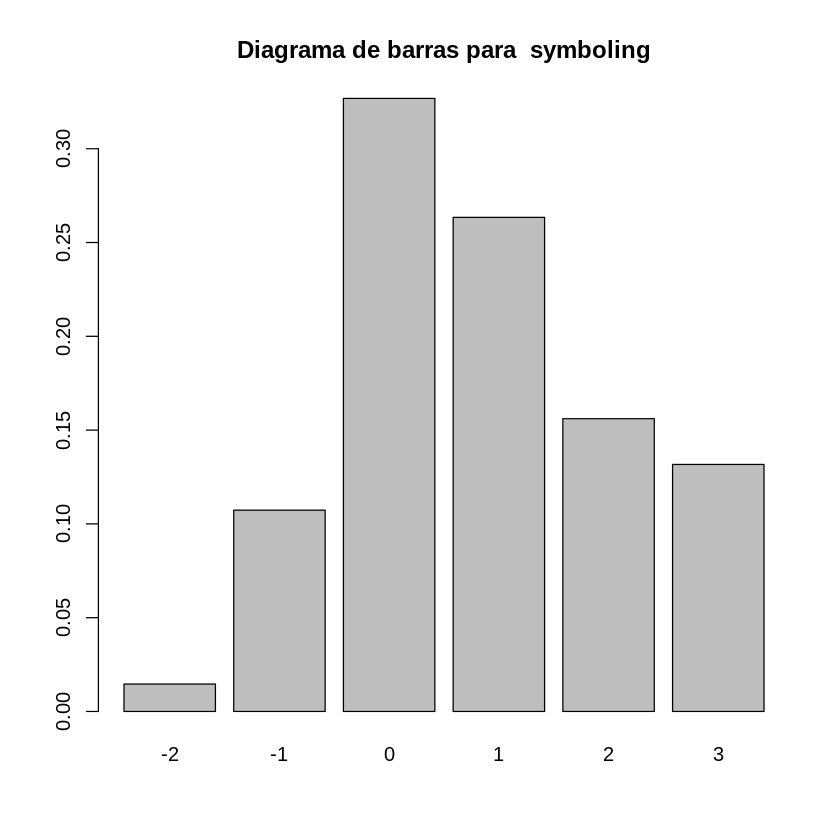

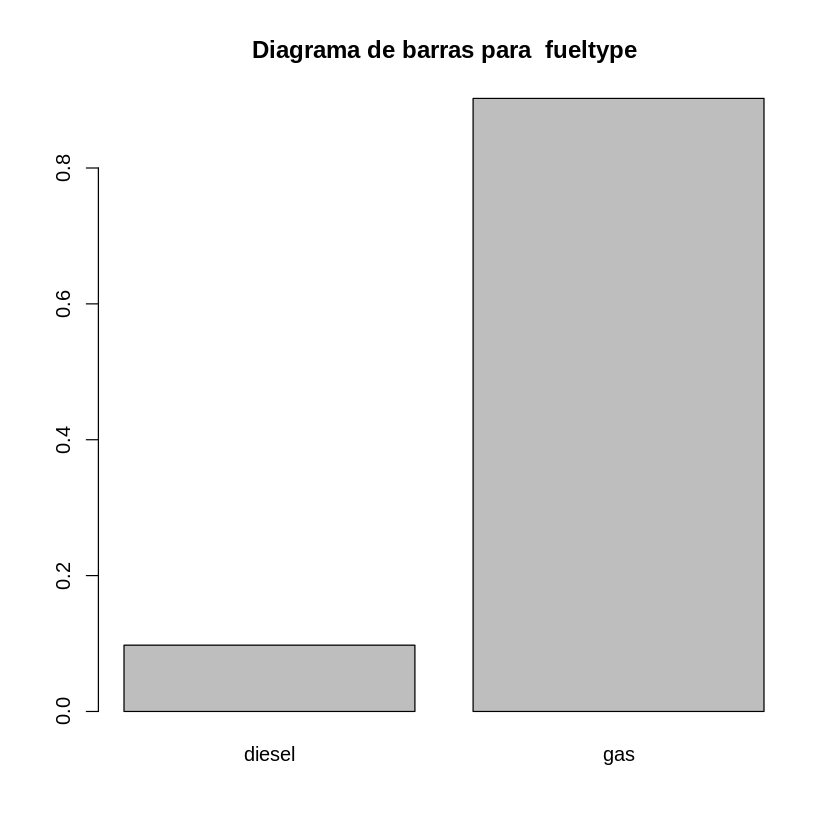

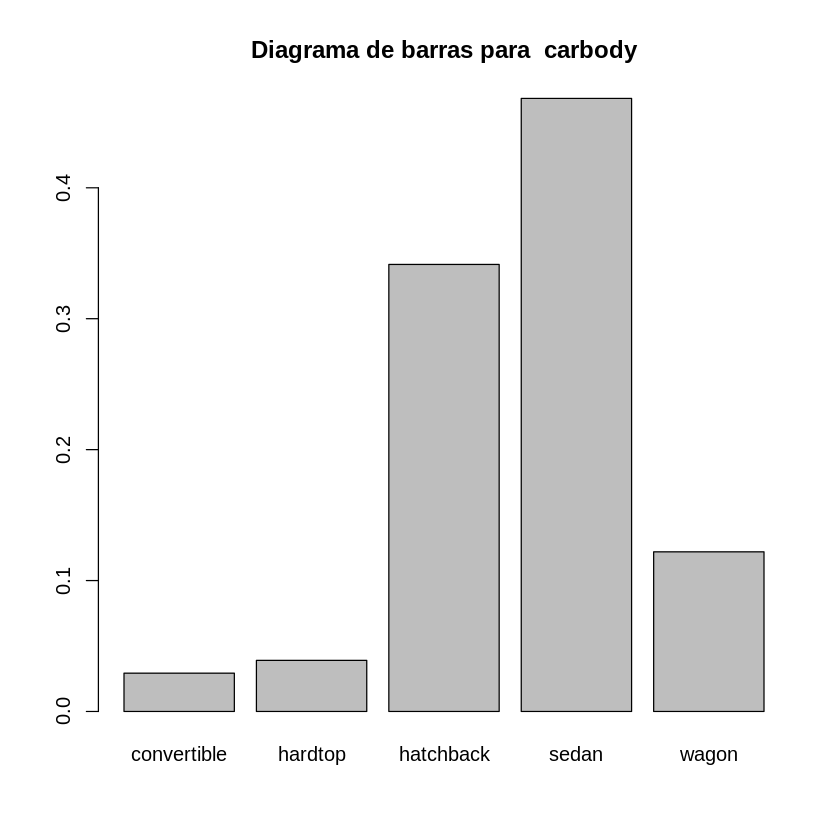

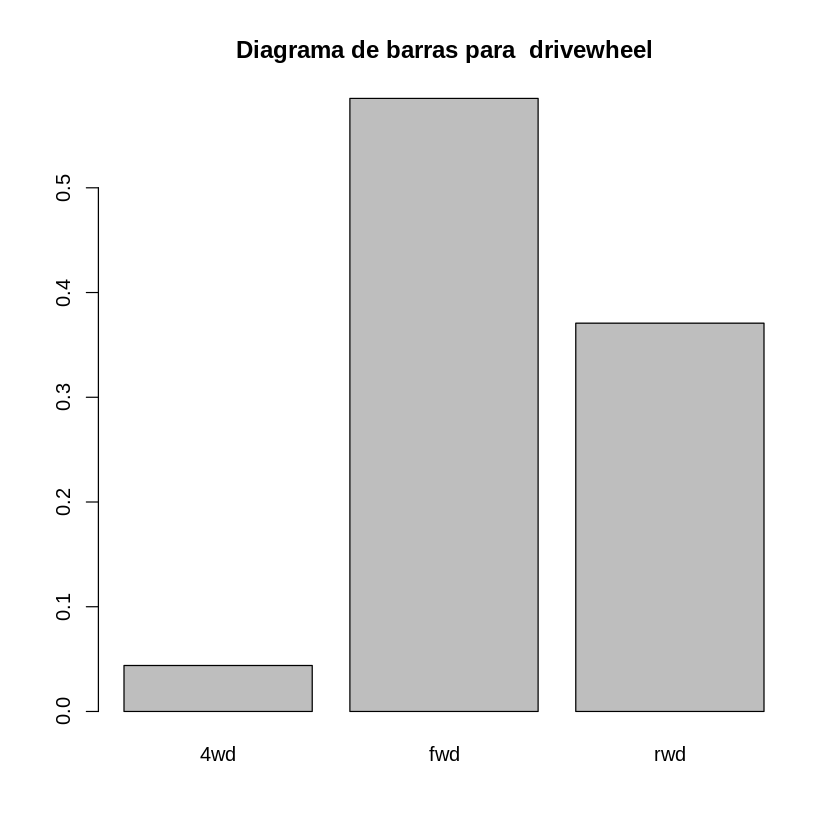

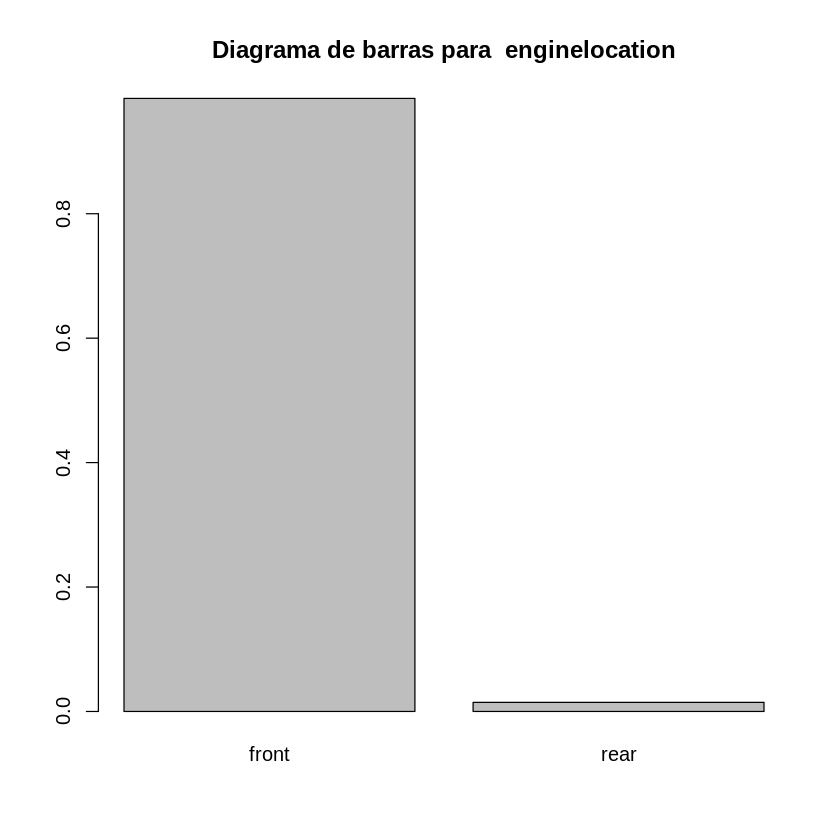

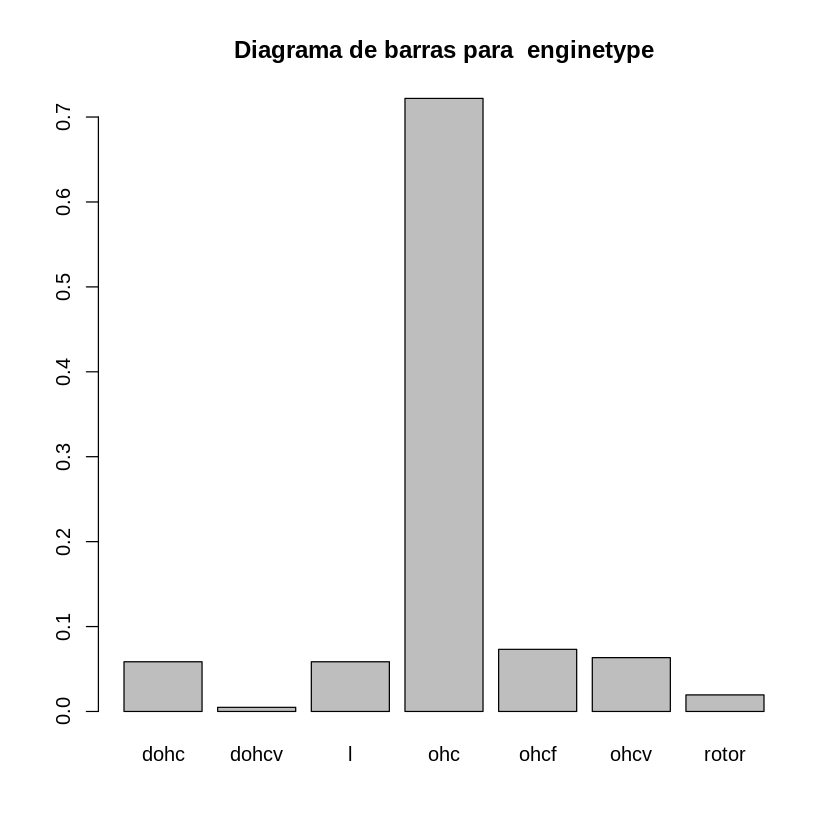

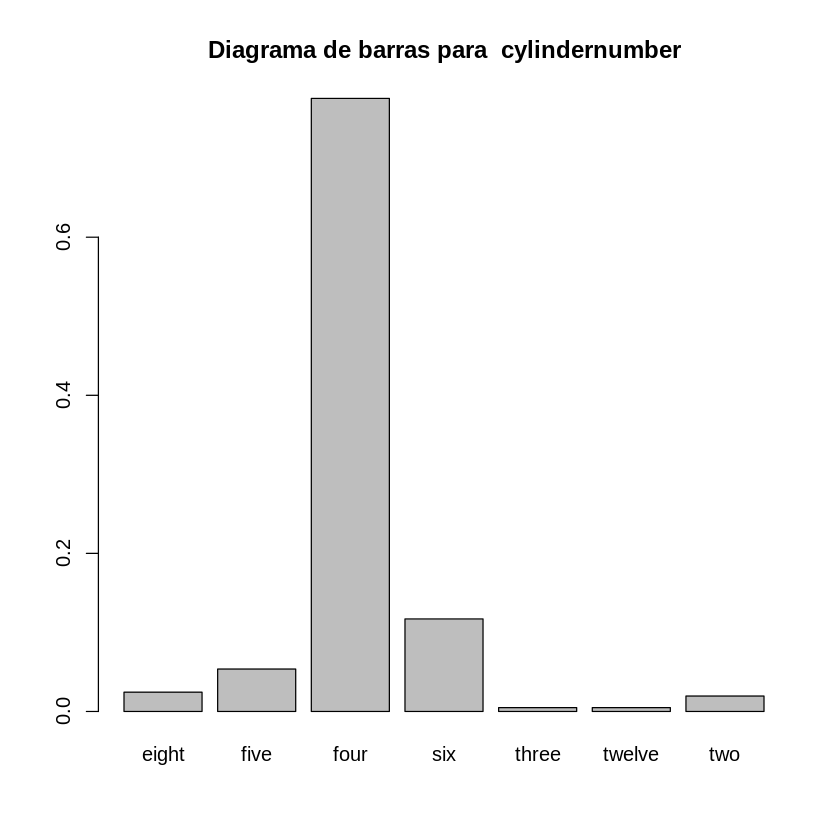

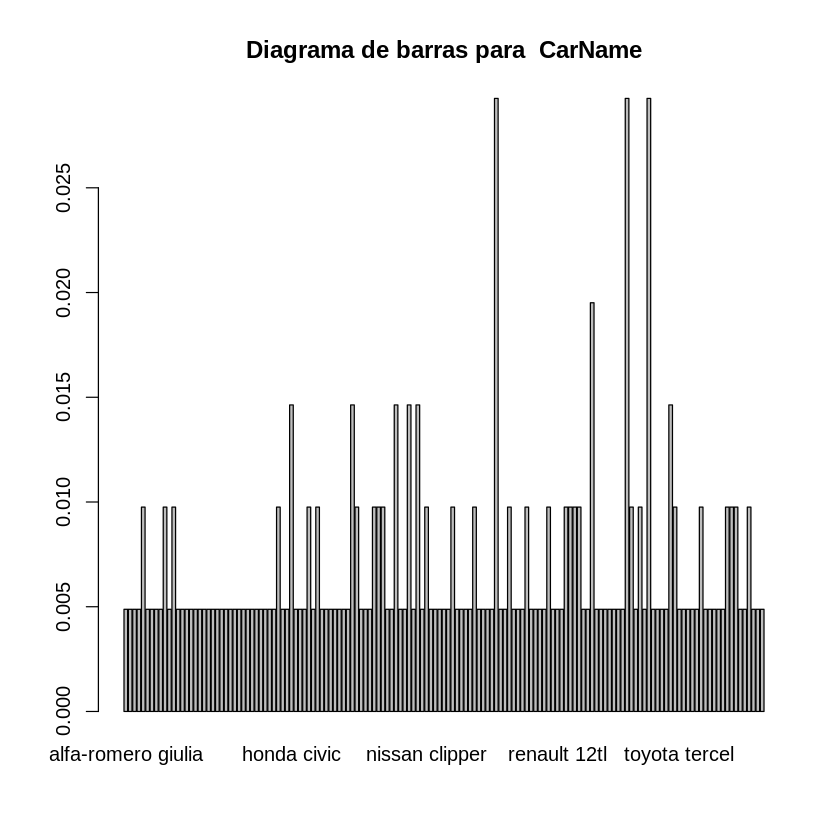

In [ ]:
variables = c('symboling', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'CarName')
for(variable in variables){
  x = M[,variable]
  barplot(prop.table(table(x)), main = paste("Diagrama de barras para ", variable))
  cat("\n\n")
}


Ahora, es importante ver cómo se relacionan estas variables con el precio final del coche. Por esto hacemos graficas de caja y bigote para cada categoria de cada variable. Aquí podremos ver si se muestra algun comportamiento que nos pueda relacionar las variables con el precio del auto.

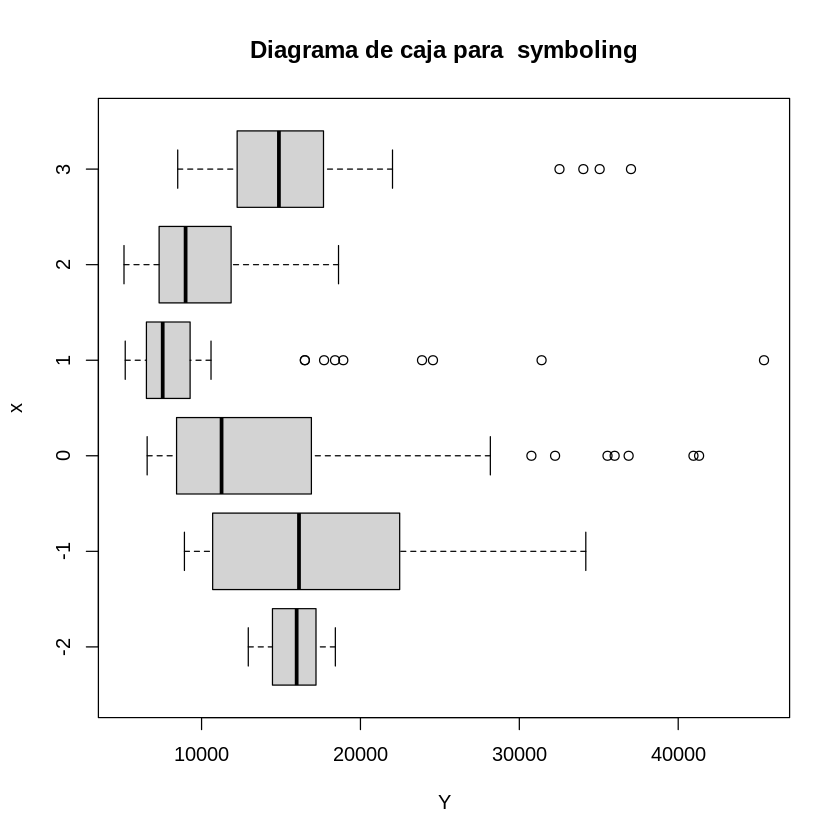

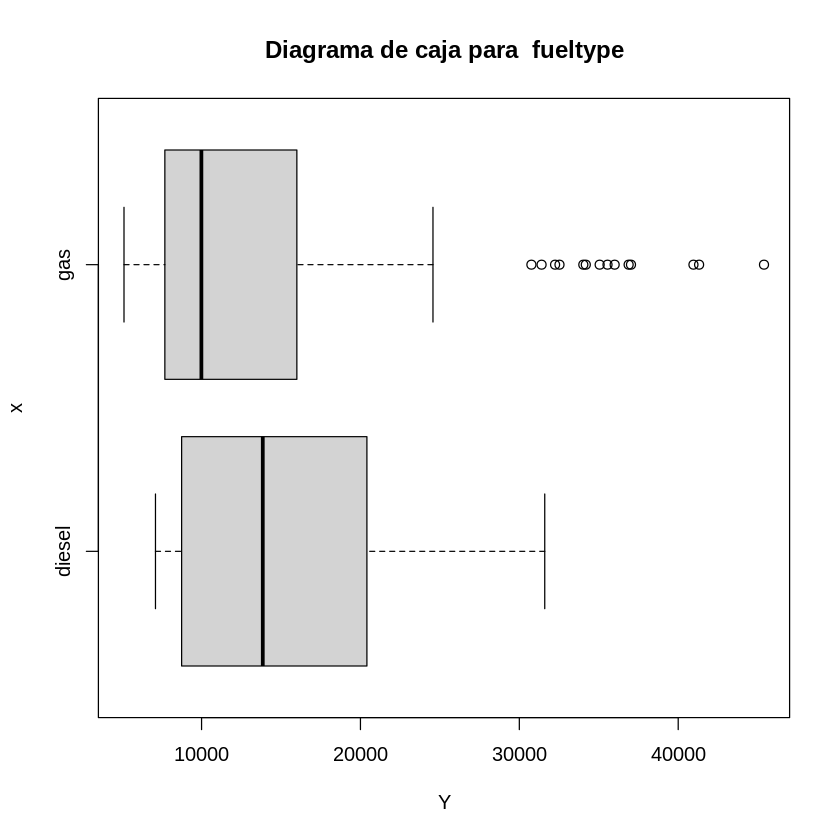

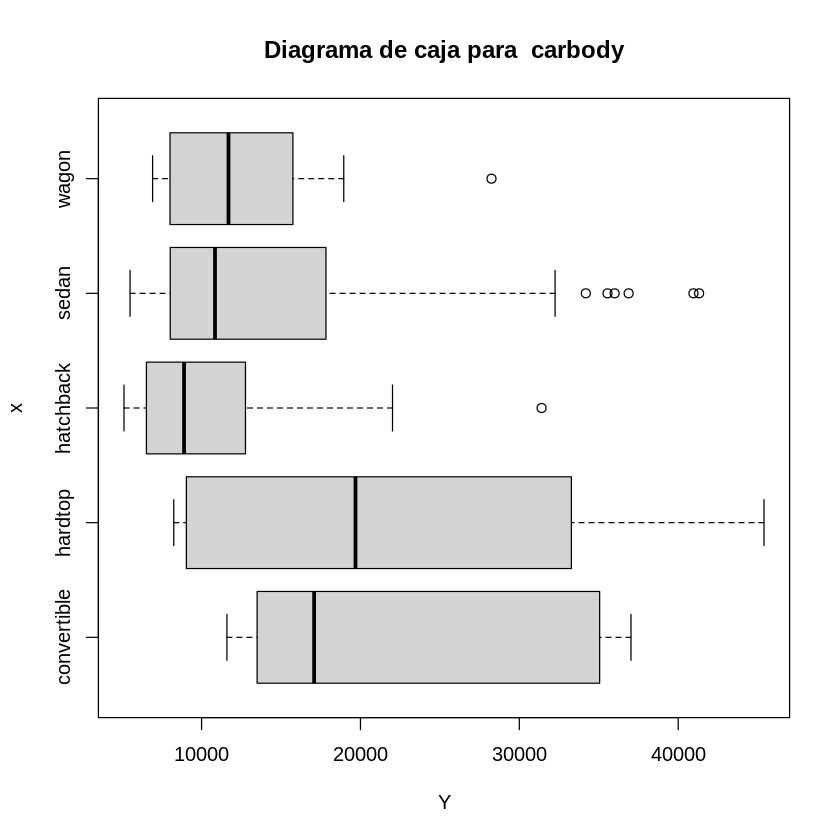

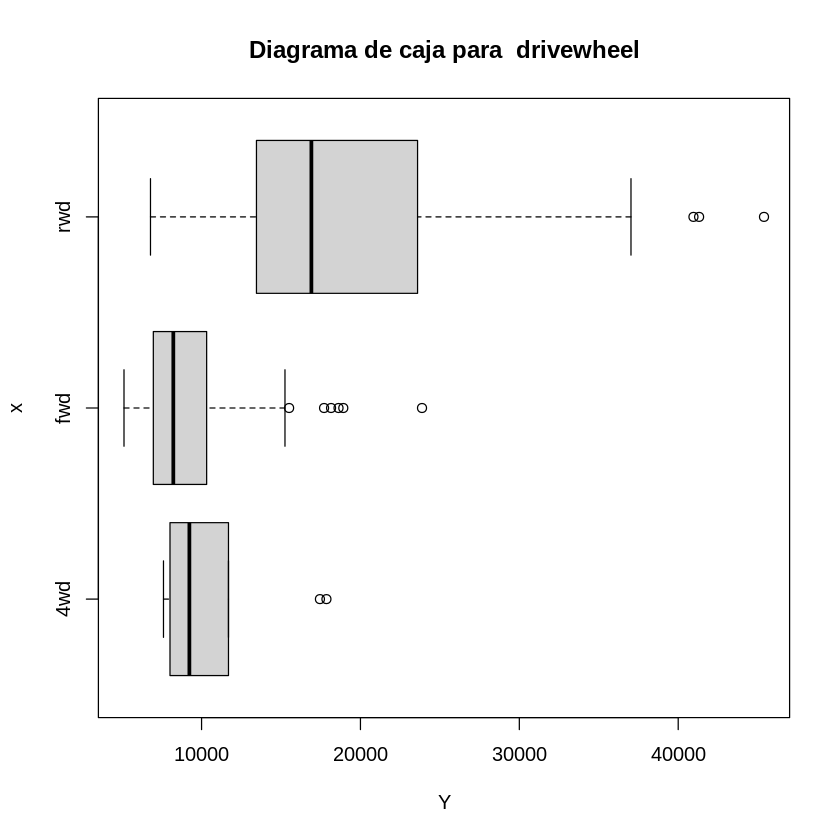

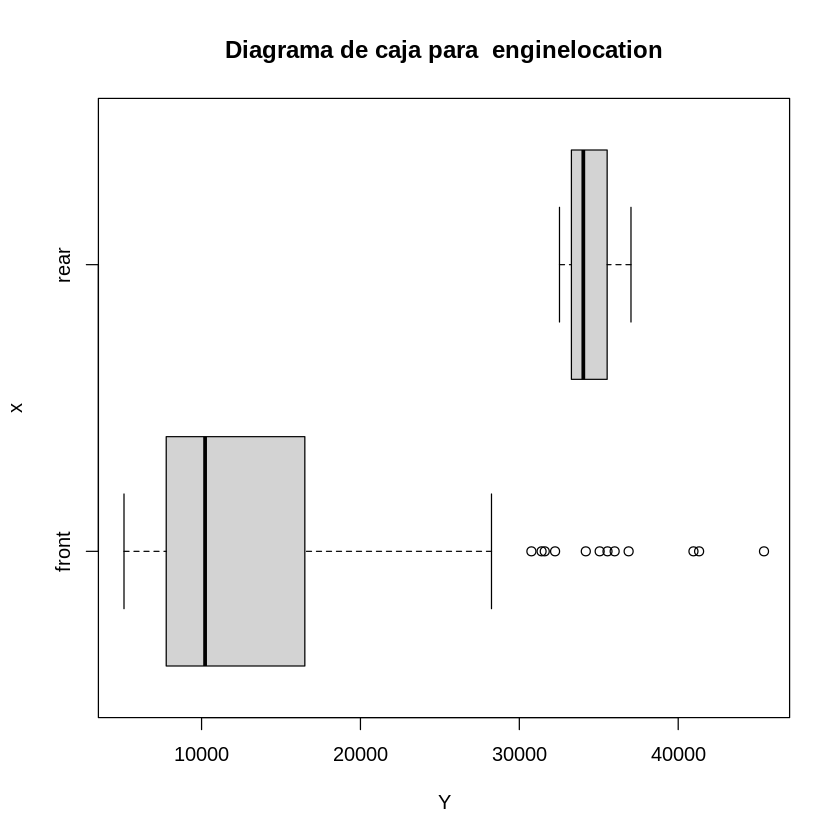

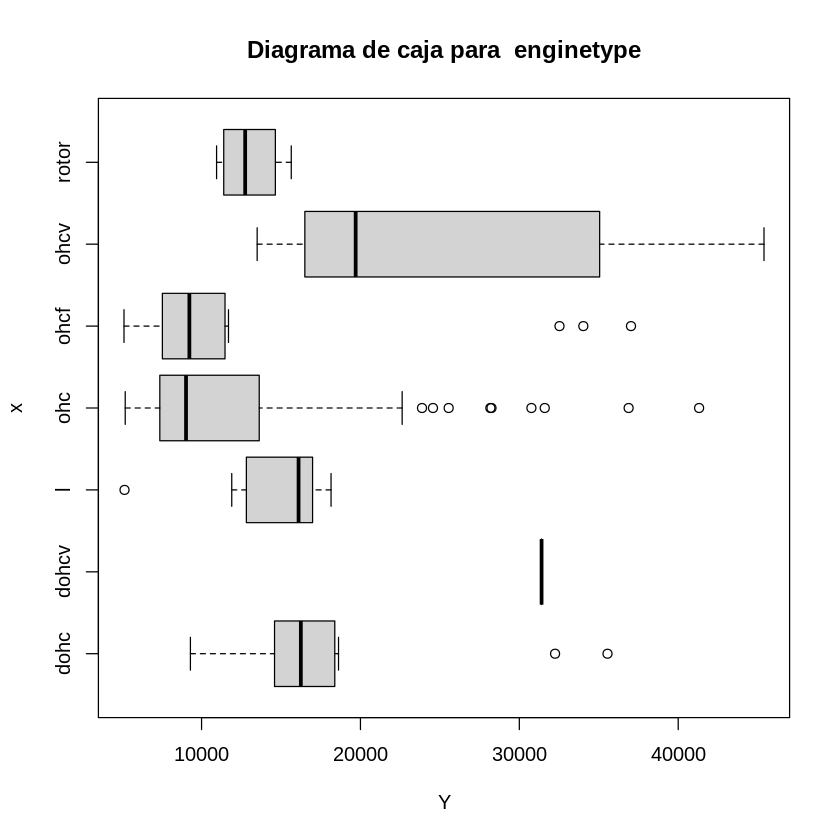

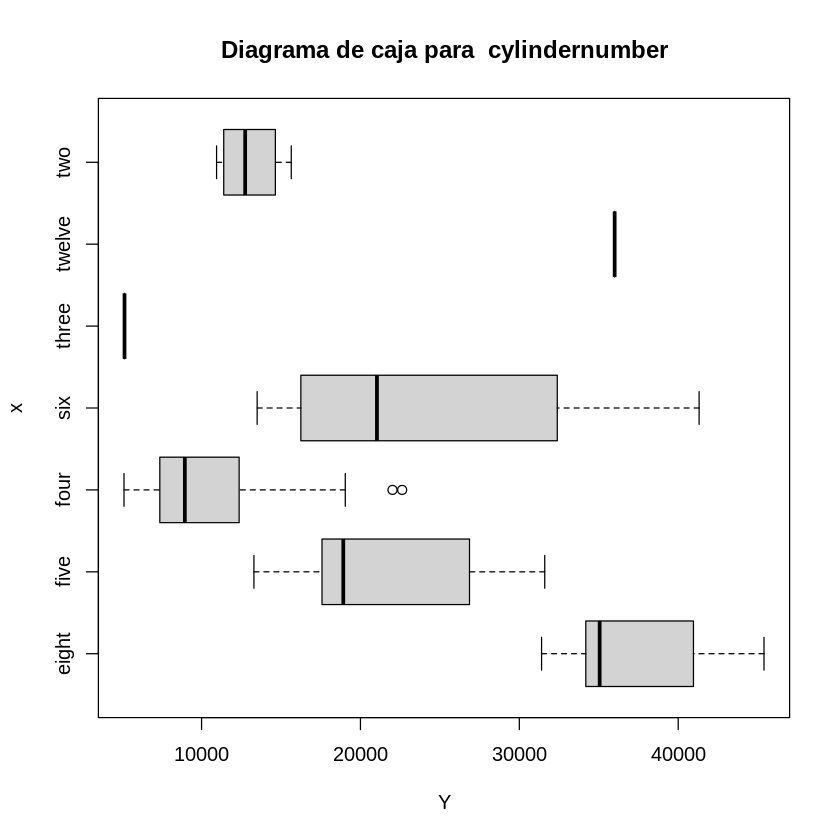

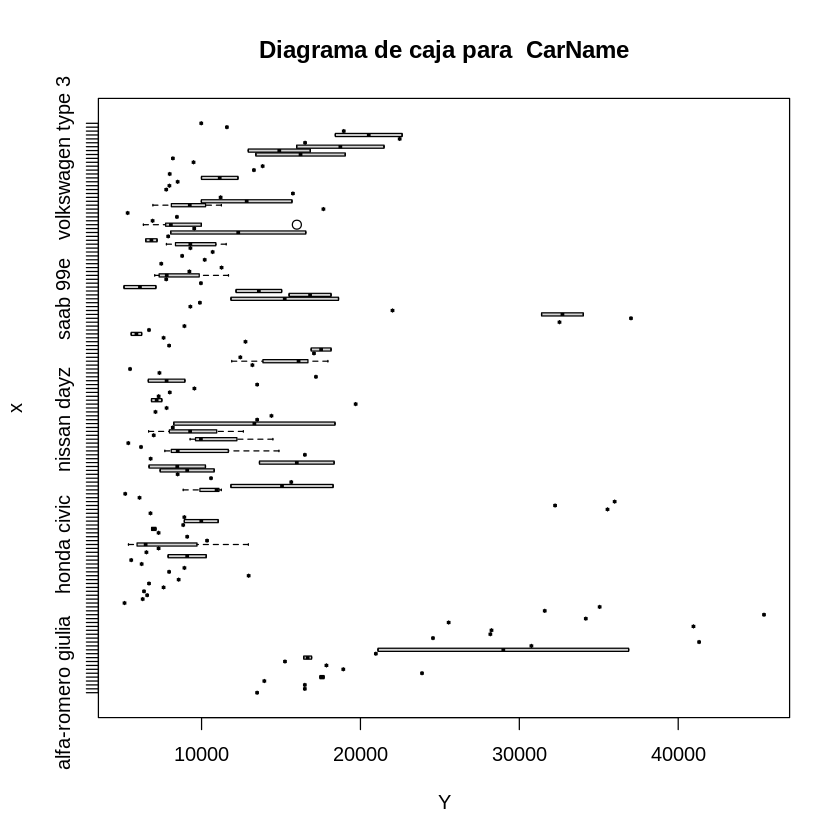

In [ ]:
Y = M$price
variables = c('symboling', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'CarName')
for(variable in variables){
  x = M[,variable]
  boxplot(Y ~ x, horizontal = TRUE, main = paste("Diagrama de caja para ", variable))
}


## **Seleccion de variables y análisis**

Es importante mencionar que en esta sección se hará un análisis de porque se eligieron estas variables para potenciar las ventas de los coches. Todos los datos duros a los que se haga referencia se encuentran desplegados más arriba en este documento.

Primero, las variables **cuantitativas**. Uno de las principales razones para seleccionar una variable o no, es el coeficiente de correlación. Por esto, se listan las variables que tienen un coeficiente de correlación alto con el precio:

* engine size: 0.87
* horsepower: 0.81
* citympg: -0.69
* highwaympg: -0.70
* curbweight: 0.84

Además, estas variables tienen entre 0 y 10 outliers. Por lo tanto, se puede analizar cada uno de los datos para ver si se pueden eliminar o si se deben mantener para el análisis.

Finalmente, los datos no son normales, casi todas las variables elegidas presentan un ligero sesgo a la derecha. Pero con transformaciones se pueden llegar a distribuciones normales facilmente.

Sobre las variables **cualitativas**, se eligieron:
* carbody
* fueltype
* drivewheel

Esta elección es porque en los diagramas de caja y bigote se puede observar que dependiendo la categoría en la que está un vehículo, puede aumentar o disminuir su precio.

Hay variables que tambien presentan este comportamiento, como el enginelocation, pero no se seleccionó, porque de todos los datos, el 90% tienen el motor al frente. Y no hay un cambio tan significativo en el precio por la localización del motor.

## **Conclusiones de la selección de variables**

Finalmente, es importante considerar estas variables ya que el tamaño del motor o sus caballos de fuerza pueden aumentar su precio ya que son autos más veloces. Por lo mismo, la eficiencia de gasolina (highwaympg y citympg) pueden influir, ya que un motor más fuerte, puede tener peor eficiencia de gasolina.
Además, el curbweight nos dira el peso total del coche, y entre más accesorios tenga o el motor que tiene, el peso puede aumentar.

Por otro lado, la forma del coche (carbody) puede hacer referencia a si un auto es de lujo o no. Esto mismo puede pasar con el fueltype, ya que hay gasolinas que son más caras que otras.

## **Creación de los modelos**

**Segunda entrega**

Primero, creamos nuestra nueva base de datos solamente con las variables que usaremos para los modelos.

In [ ]:
# Selecting variables
selected_vars <- c("enginesize", "horsepower", "citympg", "highwaympg", "curbweight", "carbody", "fueltype", "drivewheel")
N <- M %>%
  select(all_of(selected_vars))

N

enginesize,horsepower,citympg,highwaympg,curbweight,carbody,fueltype,drivewheel
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
130,111,21,27,2548,convertible,gas,rwd
130,111,21,27,2548,convertible,gas,rwd
152,154,19,26,2823,hatchback,gas,rwd
109,102,24,30,2337,sedan,gas,fwd
136,115,18,22,2824,sedan,gas,4wd
136,110,19,25,2507,sedan,gas,fwd
136,110,19,25,2844,sedan,gas,fwd
136,110,19,25,2954,wagon,gas,fwd
131,140,17,20,3086,sedan,gas,fwd


## **Transformacion de los datos**

Además, podemos normalizar los datos para hacer el modelo lineal y el ANOVA. Para esta transformación se usara la función boxcox y se usará la lambda. Únicamente normalizamos las variables que son cuantitativas, ya que las cualitativas no se pueden normalizar.

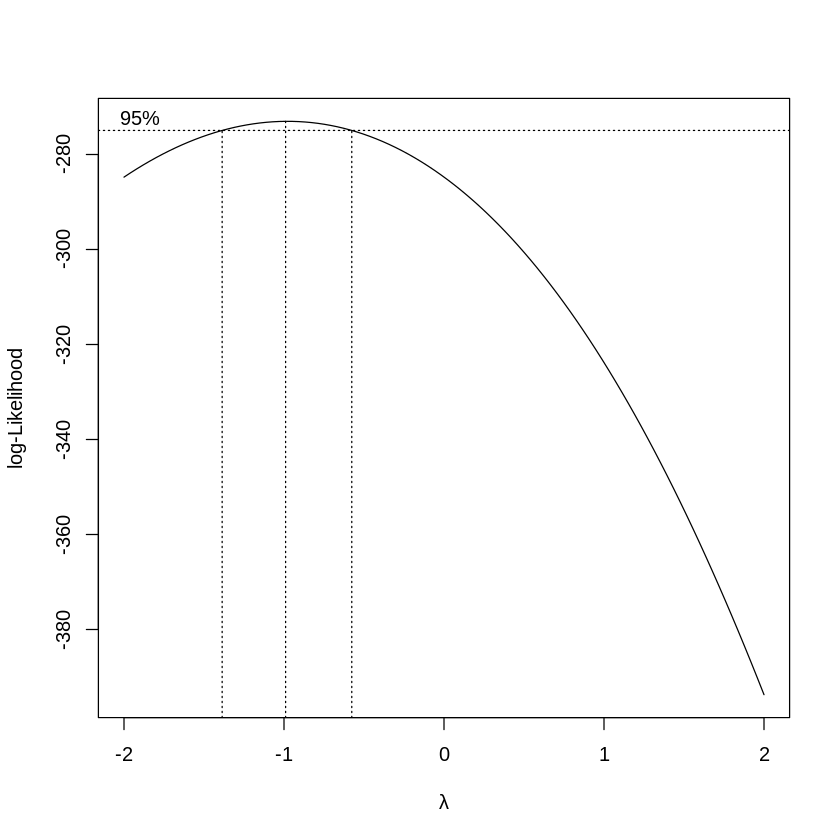

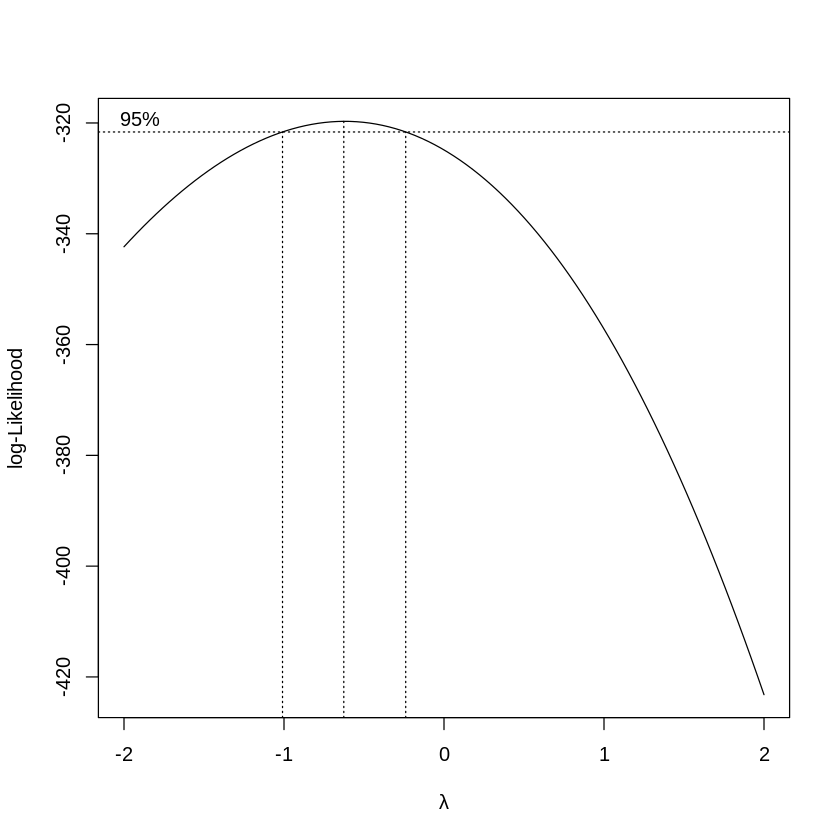

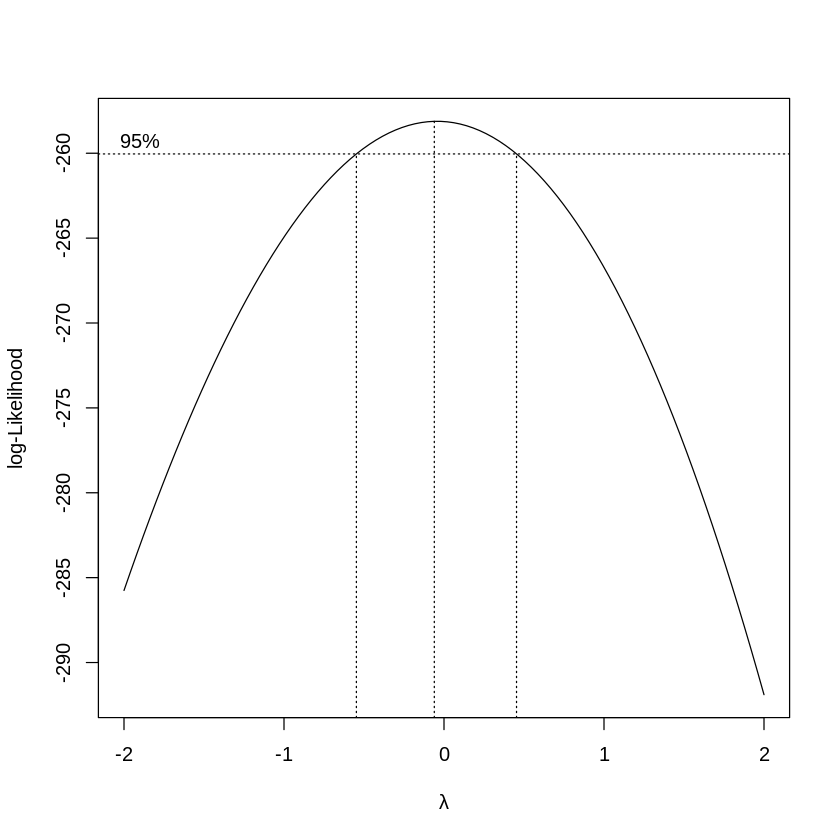

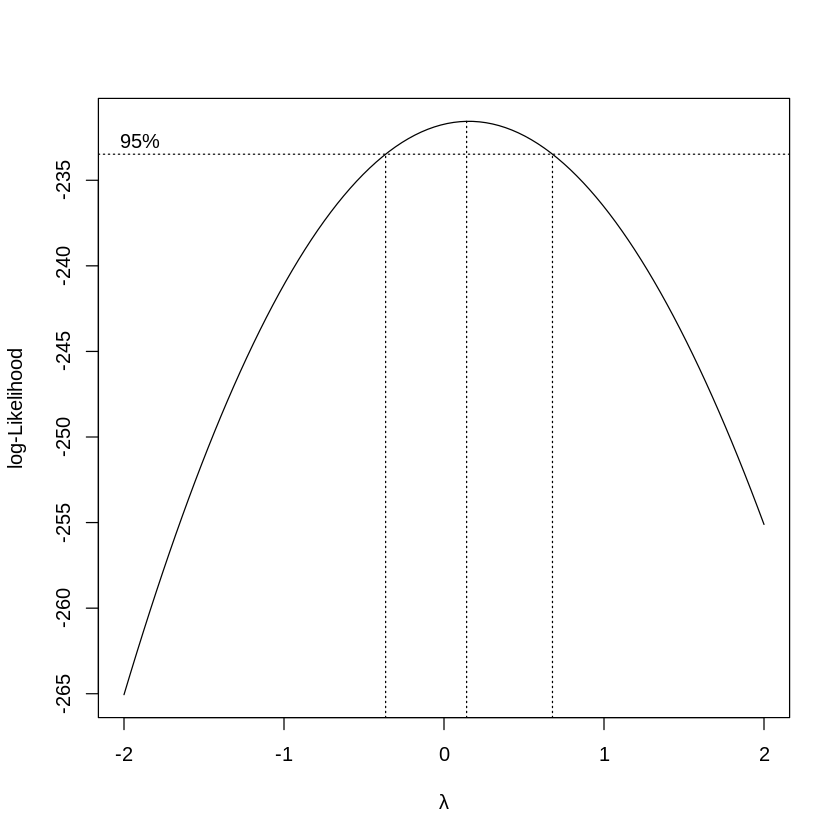

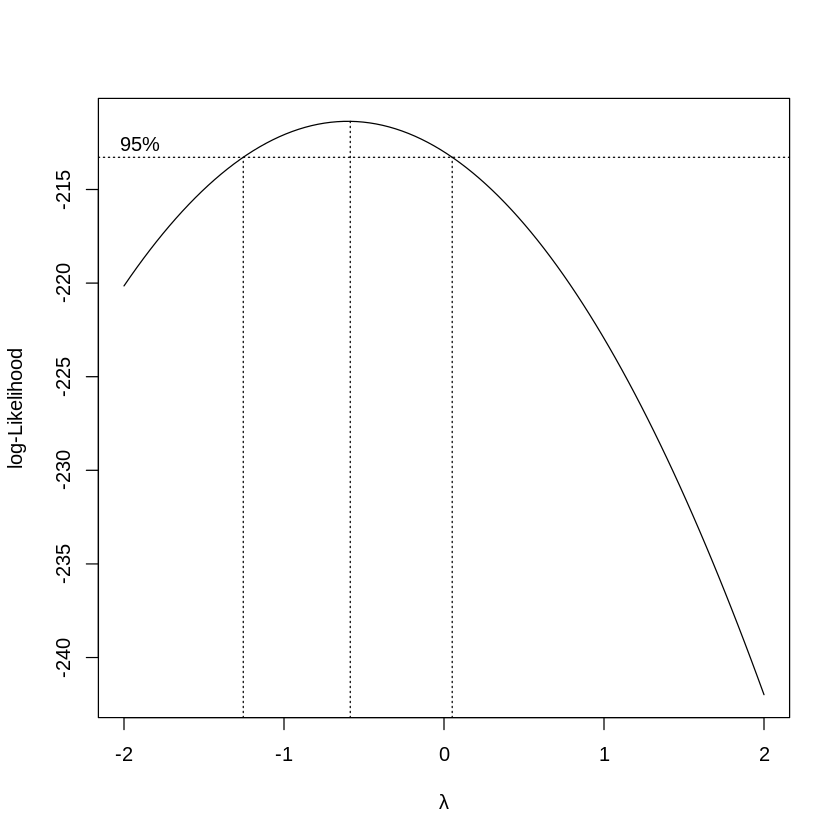

In [ ]:
variables = c("enginesize", "horsepower", "citympg", "highwaympg", "curbweight")
Nn <- N
for(variable in variables){
  x = M[,variable]
  bc <- MASS::boxcox((x+1)~1)
  l = bc$x[which.max(bc$y)] #lambda que optimiza

  norm = ((x+1)^l - 1) / l
  Nn[[variable]] <- norm
}

## **Modelo lineal**

Ya que tenemos las varibles normalizadas, podemos empezar a hacer el modelo lineal. Podemos probar hacer el modelo con los datos normalizados y con los datos sin normalizar.

In [ ]:
#Con los datos normalizados
A = lm(Y~Nn$enginesize+Nn$horsepower+Nn$curbweight+Nn$carbody)
summary(A)


Call:
lm(formula = Y ~ Nn$enginesize + Nn$horsepower + Nn$curbweight + 
    Nn$carbody)

Residuals:
     Min       1Q   Median       3Q      Max 
-11539.2  -2618.0   -486.4   1860.9  16999.0 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -3751512.2   450135.1  -8.334 1.32e-14 ***
Nn$enginesize         561475.8   286579.8   1.959 0.051497 .  
Nn$horsepower          98702.8    30296.8   3.258 0.001322 ** 
Nn$curbweight        1810387.6   355706.9   5.090 8.35e-07 ***
Nn$carbodyhardtop       -140.9     2329.5  -0.060 0.951846    
Nn$carbodyhatchback    -5043.0     1867.1  -2.701 0.007515 ** 
Nn$carbodysedan        -3789.5     1834.8  -2.065 0.040199 *  
Nn$carbodywagon        -6802.2     2030.3  -3.350 0.000967 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4301 on 197 degrees of freedom
Multiple R-squared:   0.72,	Adjusted R-squared:  0.7101 
F-statistic: 72.38 on 7 and 197 DF,  p-value

In [ ]:
#Con los datos sin normalizar
A = lm(Y~N$enginesize+N$horsepower+N$curbweight+N$carbody)
summary(A)


Call:
lm(formula = Y ~ N$enginesize + N$horsepower + N$curbweight + 
    N$carbody)

Residuals:
    Min      1Q  Median      3Q     Max 
-9144.4 -1632.9   -24.1  1515.8 13830.7 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -9427.1368  1951.9260  -4.830 2.74e-06 ***
N$enginesize          68.2372    12.9575   5.266 3.63e-07 ***
N$horsepower          50.3111    10.7358   4.686 5.18e-06 ***
N$curbweight           4.9859     0.9795   5.090 8.33e-07 ***
N$carbodyhardtop   -1561.3180  1807.8562  -0.864 0.388842    
N$carbodyhatchback -4800.3262  1436.4233  -3.342 0.000996 ***
N$carbodysedan     -3358.9306  1414.1982  -2.375 0.018502 *  
N$carbodywagon     -5435.5524  1568.0380  -3.466 0.000647 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3323 on 197 degrees of freedom
Multiple R-squared:  0.8329,	Adjusted R-squared:  0.827 
F-statistic: 140.3 on 7 and 197 DF,  p-value: < 2.2e-16


### Verificación del modelo

**Significancia global**
Podemos ver que de los dos modelos, el de los datos normalizados tiene un valor f de 72.38 y el modelo con los datos sin normalizar tiene un valor de 140.3. Los dos son un buen valor, ya que este número representa que las variables tienen un impacto en el modelo.

Ahora, aunque el modelo con los datos normalizados es bueno, podemos ver que hay muchisima más significancia en el modelo que no tiene los datos normalizados.

**Significancia individual**
Además, en los dos modelos tenemos un valor grande para todos los valores de t de las variables y también tienen un valor p muy pequeño. Esto quiere decir que son variables importantes para el modelo.

**Variación epxlicada por el modelo**
Finalmente, tenemos un coeficiente de determinación de 0.827 para el modelo sin normalizar y un 0.7101 para el modelo con variables normalizadas. Esto nos dice que el modelo sin variables normalizadas puede explicar mucho mejor la mayoría de los datos.



### Validez del modelo

Para verificar que el modelo es apropiado para el conjunto de datos, podemos comprobar los siguientes puntos:

* Normalidad de los residuos
* Verificación de media cero
* Homocedasticidad e independencia

#### Normalidad de los residuos


	Shapiro-Wilk normality test

data:  A$residuals
W = 0.97082, p-value = 0.0002925


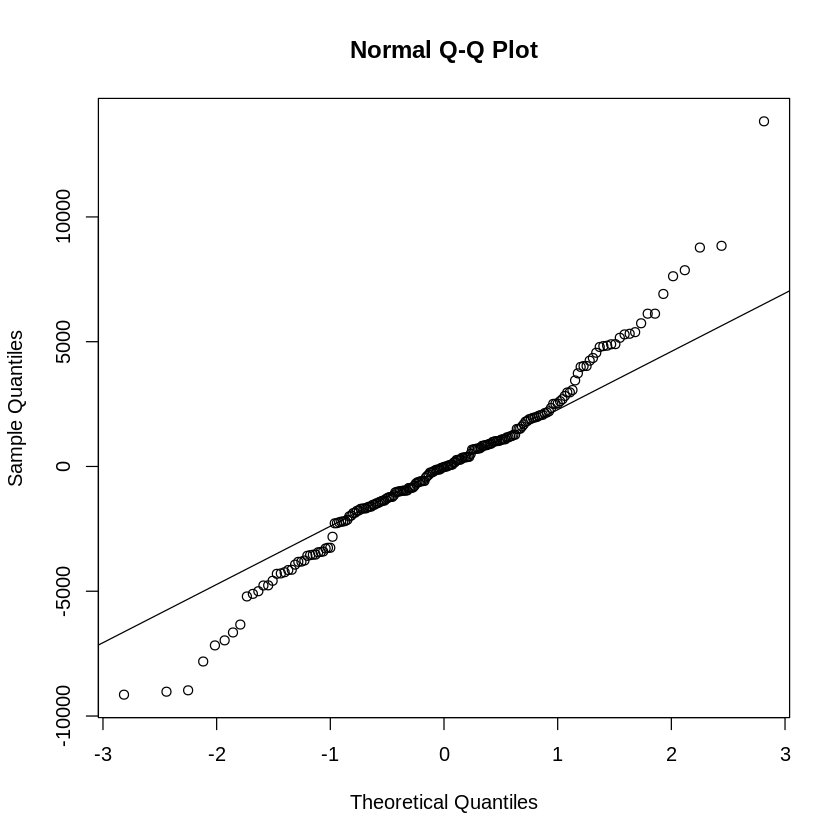

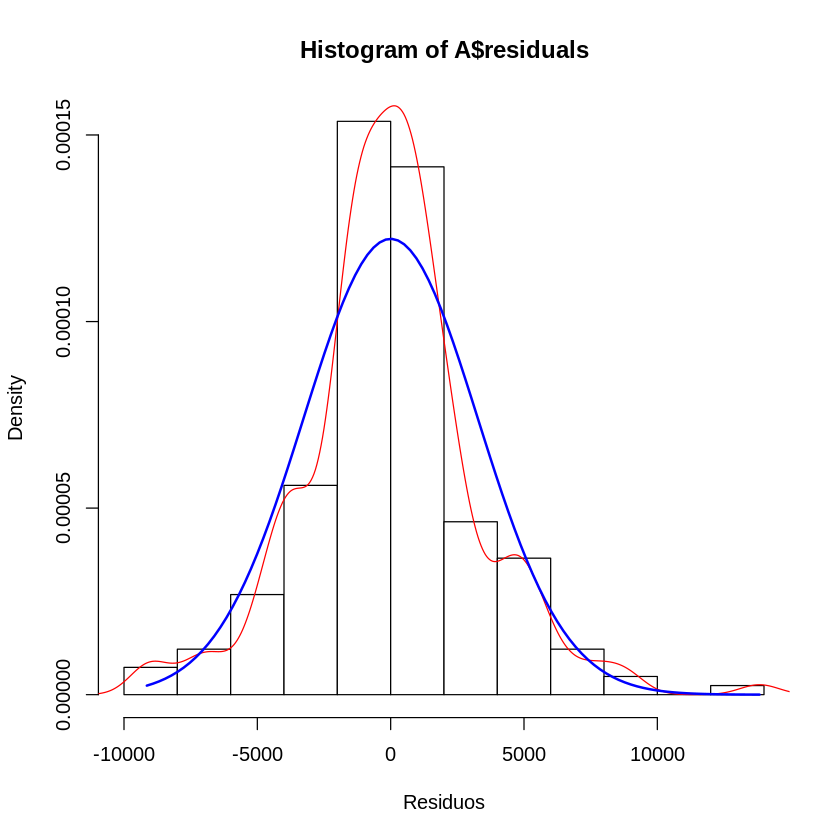

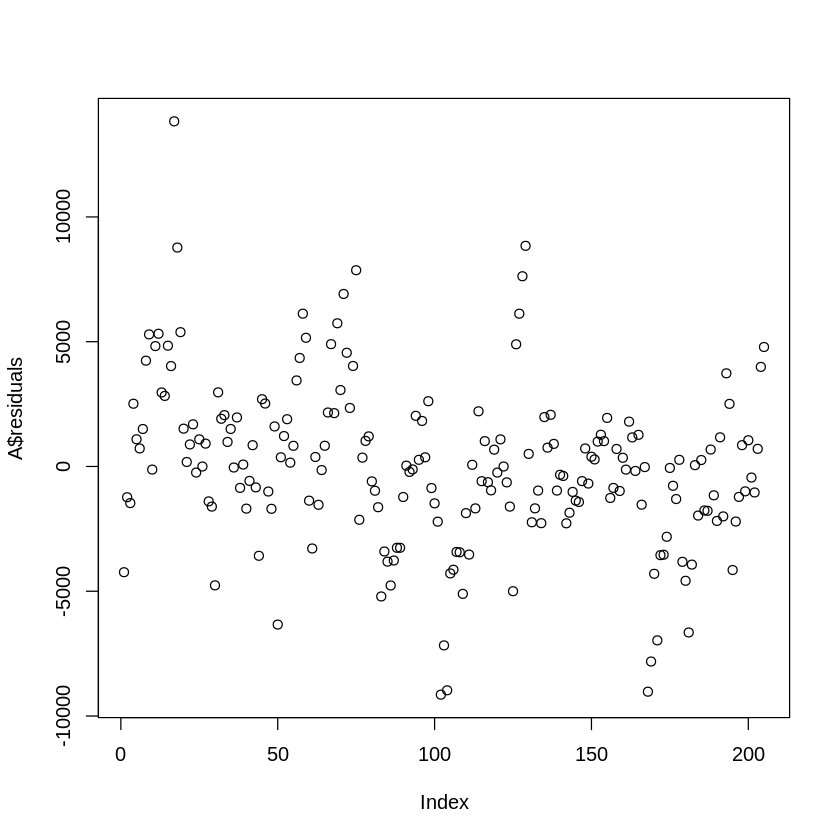

In [ ]:
#Prueba de normalidad

shapiro.test(A$residuals)

#Gráficas auxiliares:
qqnorm(A$residuals)
qqline(A$residuals)

hist(A$residuals,freq=FALSE, xlab="Residuos", col=0)
lines(density(A$residuals),col="red")
curve(dnorm(x,mean=mean(A$residuals),sd=sd(A$residuals)), from=min(A$residuals),to=max(A$residuals), add=TRUE, col="blue",lwd=2)

plot(A$residuals)

In [ ]:
install.packages("nortest")
library(nortest)
ad.test(A$residuals)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Anderson-Darling normality test

data:  A$residuals
A = 1.7988, p-value = 0.0001294


Podemos ver que los datos no se comportan completamente normales. En el qqplot tenemos unas colas un poco pronunciadas. Además, la distribución de los residuales en el histograma no llega a ser normal aunque se parece y la distribución en la tercer gráfica no parece que los residuales tengan un comportamiento. Podemos decir que los residuos parecen normales pero tampoco se podría decir que su distribución sea la deseada.

De todas formas, podemos decir que se obtienen buenos resultados, ya que estamos usando el modelo de los datos sin normalizar y los residuos se acercan bastante como para ser considerados normales. El modelo no es perfecto, pero funciona correctamente.

#### Verificación de media 0

In [ ]:
#Verificacion de media 0

t.test(A$residuals)


	One Sample t-test

data:  A$residuals
t = 7.979e-16, df = 204, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -449.7008  449.7008
sample estimates:
   mean of x 
1.819878e-13 


El resultado del test para la t de student nos dice que la media no es 0, por lo tanto el resultado del modelo puede no se completamente confiable. Esto es lo mismo que veiamos arriba en las gráficas, donde los residuos no son completamente normales.

#### Homocedasticidad

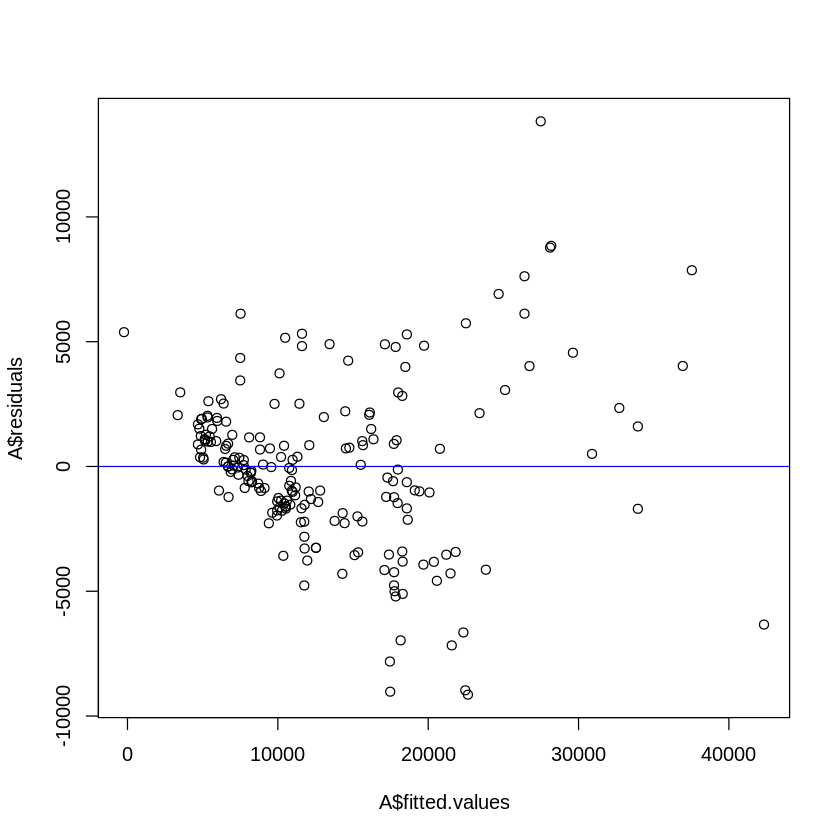

In [ ]:
#Homocedasticidad

plot(A$fitted.values,A$residuals)
abline(h=0, col="blue")

Viendo la gráfica podemos decir que los datos si presentan un comportamiento de homocedasticidad e independencia. Como lo mencionabamos anteriormente, la distribución no es ideal pero tampoco parece que los datos sigan un comportamiento específico que indique que hay una variable que no estamos tomando en cuenta.

## **ANOVA**

Podemos hacer un segundo modelo utilizando el método de ANOVA. Es importante mencionar que este modelo utiliza variables categóricas y las compara con la variable dependiente del precio.

Utilizaremos este modelo porque la mayoría de las variables categóricas quedaron fuera del modelo lineal, y aquí podremos comprobar si con el ANOVA podemos encontrar más variables que sean significativas para el modelo.

Primero, comenzamos creando el modelo con las dos variables que no utilizamos en el modelo lineal y graficando sus interacciones. Además, definir las hipótesis para este modelo como:


**Primera hipótesis**

$H_0: \tau_i=0$

$H_1:$ algún $\tau_i$ es distinto de cero

**Segunda hipótesis**

$H_0: \alpha_i=0$

$H_1:$ algún $\alpha_i$ es distinto de cero

              Df    Sum Sq   Mean Sq F value   Pr(>F)    
N$carbody      4 1.802e+09 4.505e+08   12.58 3.87e-09 ***
N$drivewheel   2 4.126e+09 2.063e+09   57.61  < 2e-16 ***
Residuals    198 7.091e+09 3.581e+07                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

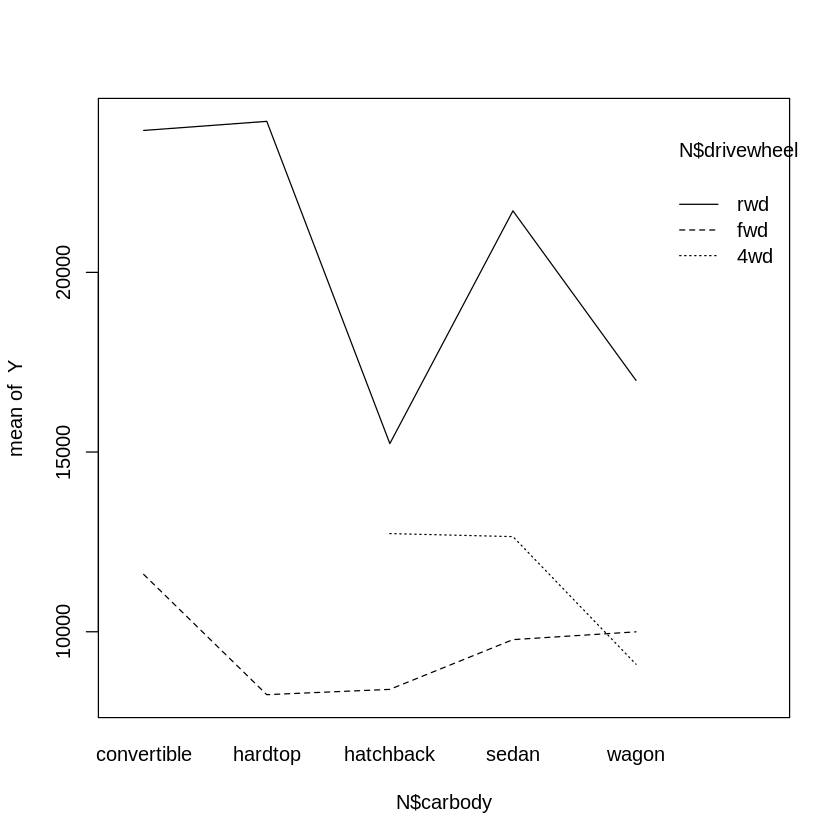

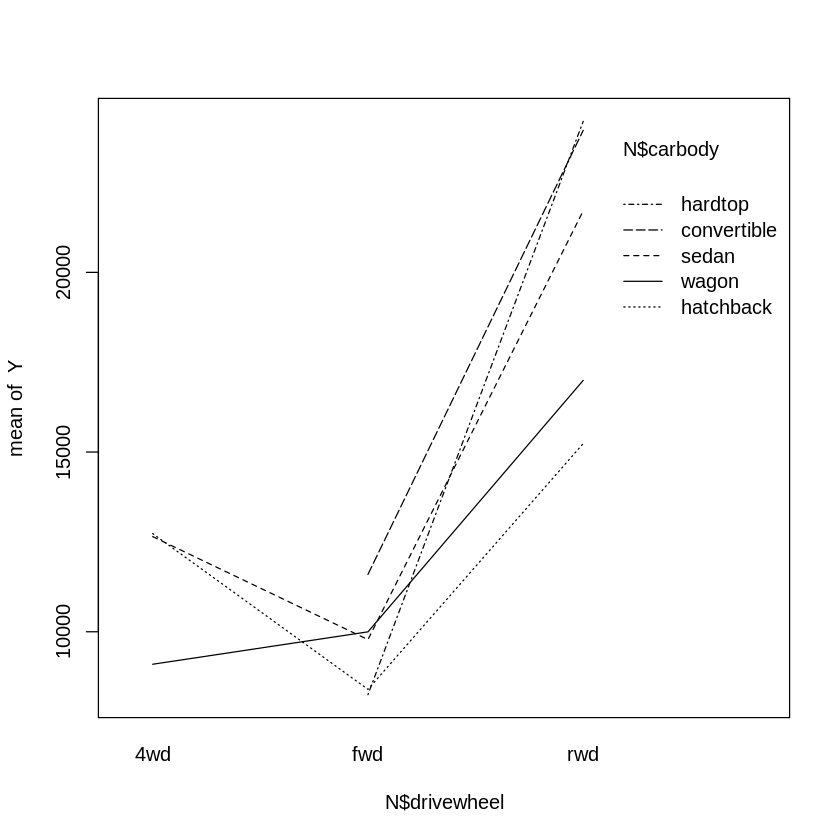

In [ ]:
B<-aov(Y~N$carbody+N$drivewheel)
summary(B)

interaction.plot(N$carbody, N$drivewheel, Y)
interaction.plot(N$drivewheel, N$carbody, Y)

Las dos variables utilizadas para este modelo son significativas, ya que tienen un valor p muy pequeño. Y estos valores p pequeños nos indican que no rechazamos la $H_0$ de ninguna de las dos hipótesis.

También esto se sustenta porque viendo las gráficas las lineas de cada variable se cruzan entre ellas y esto nos indica que hay interacción en las dos variables

En los diagramas de caja y bigotes podemos ver que la distribución de los datos es bastante amplia, es decir, que sus intervalos de confianza se encuentran separados. Por esto se sigue sustentando que son variables significativas para el precio final que tendrá el coche.

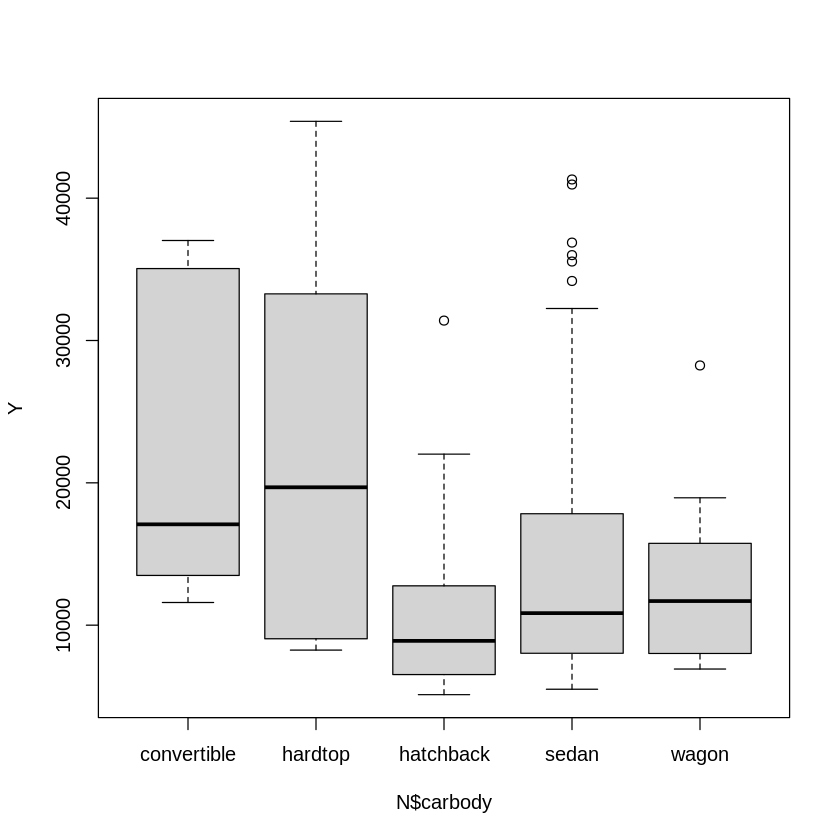

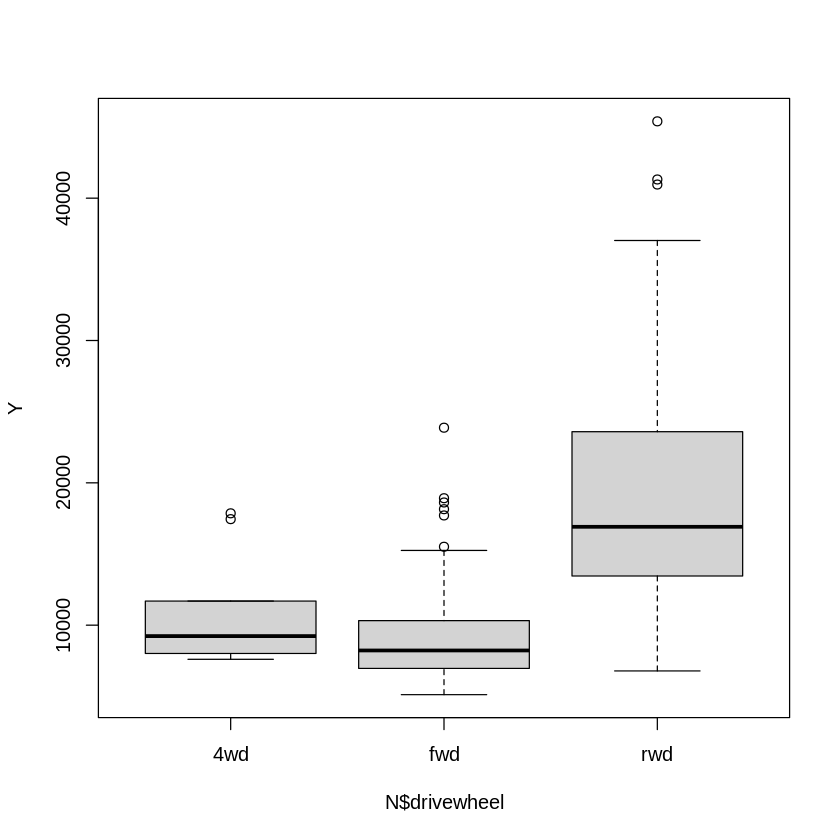

In [ ]:
boxplot(Y~N$carbody)
boxplot(Y~N$drivewheel)

Además, en el siguiente gráfico podemos ver que las variables son bastantes diferentes entre sí, ya casi todos los rangos de estas variables no pasan por el 0.

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Y ~ N$carbody + N$drivewheel)

$`N$carbody`
                            diff        lwr        upr     p adj
hardtop-convertible      318.000  -8580.010  9216.0098 0.9999787
hatchback-convertible -11513.848 -18522.453 -4505.2418 0.0001019
sedan-convertible      -7546.229 -14479.503  -612.9558 0.0253462
wagon-convertible      -9518.540 -17008.590 -2028.4903 0.0051775
hatchback-hardtop     -11831.848 -17980.823 -5682.8720 0.0000031
sedan-hardtop          -7864.229 -13927.201 -1801.2575 0.0040394
wagon-hardtop          -9836.540 -16529.087 -3143.9926 0.0007051
sedan-hatchback         3967.618   1378.101  6557.1362 0.0003583
wagon-hatchback         1995.308  -1843.464  5834.0791 0.6084330
wagon-sedan            -1972.311  -5671.756  1727.1339 0.5846208

$`N$drivewheel`
             diff       lwr      upr     p adj
fwd-4wd -1917.509 -6801.748  2966.73 0.6238243
rwd-4wd  7069.739  2087.835 12051.6

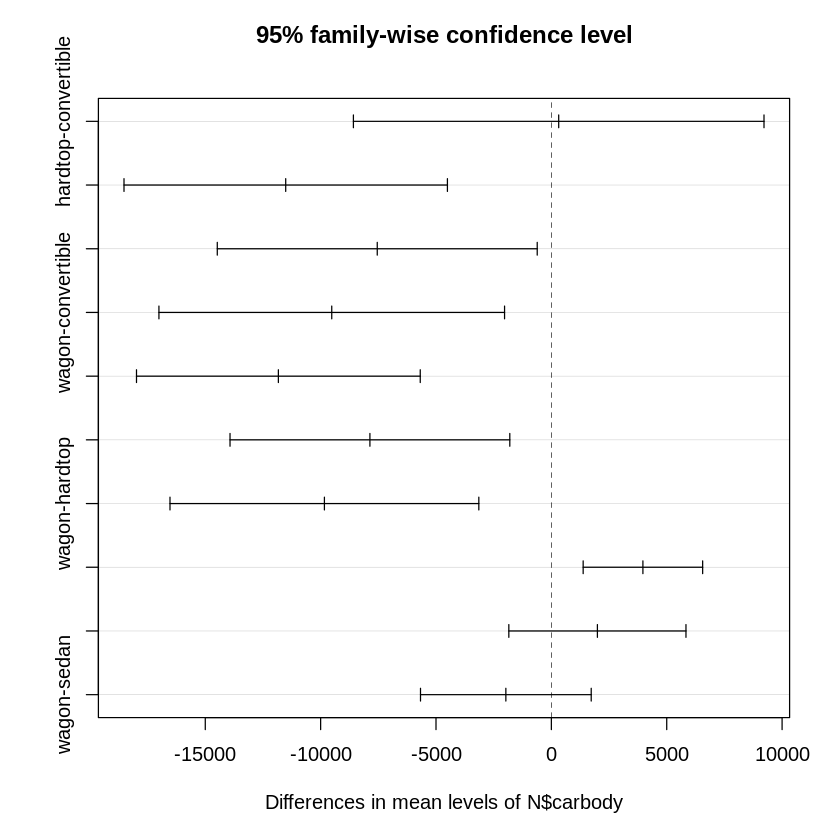

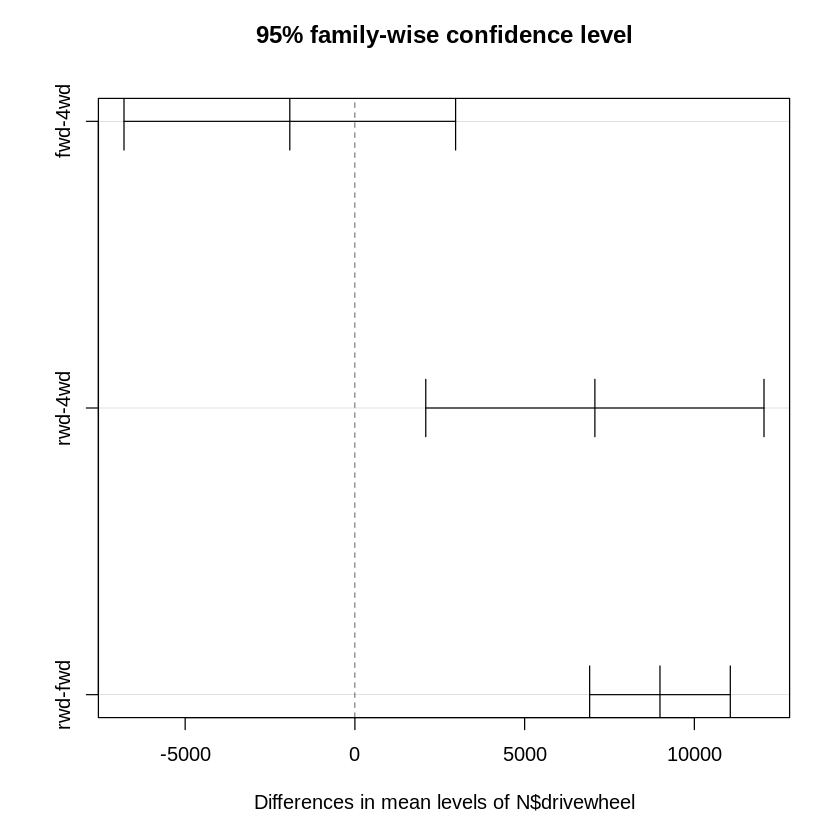

In [ ]:
I = TukeyHSD(aov(Y~N$carbody+N$drivewheel))
I
plot(I) #Los intervalos de confianza se observan

## **Conclusiones de los modelos**

Después de realizar las pruebas para los modelos, podemos concluir que las variables seleccionadas en su mayoría pueden dar una explicación bastante descente que es el precio de los coches.

La empresa puede tomar en cuenta que para variar el precio de un coche es muy importante tomar en cuenta el tamaño del motor, los caballos de fuerza que tiene el mismo o la tecnología que se usa para la tracción de las ruedas. Además, la forma del auto puede ser que determine si pertenece a una linea de lujo o no, y por eso afectar en su precio.

Aun así, es importante mencionar que esto no implica que las variables que no fueron utilizadas para la generación de modelos no sean significativas para determinar el precio, pero se recomienda altamente que la empresa tome en cuenta las variables mencionadas anteriormente para entender los precios de los coches que se encuentran en el mercado americano. Y así, poder establecer precios de sus carros tomando en cuenta esas mismas variables para competir en el mercado.

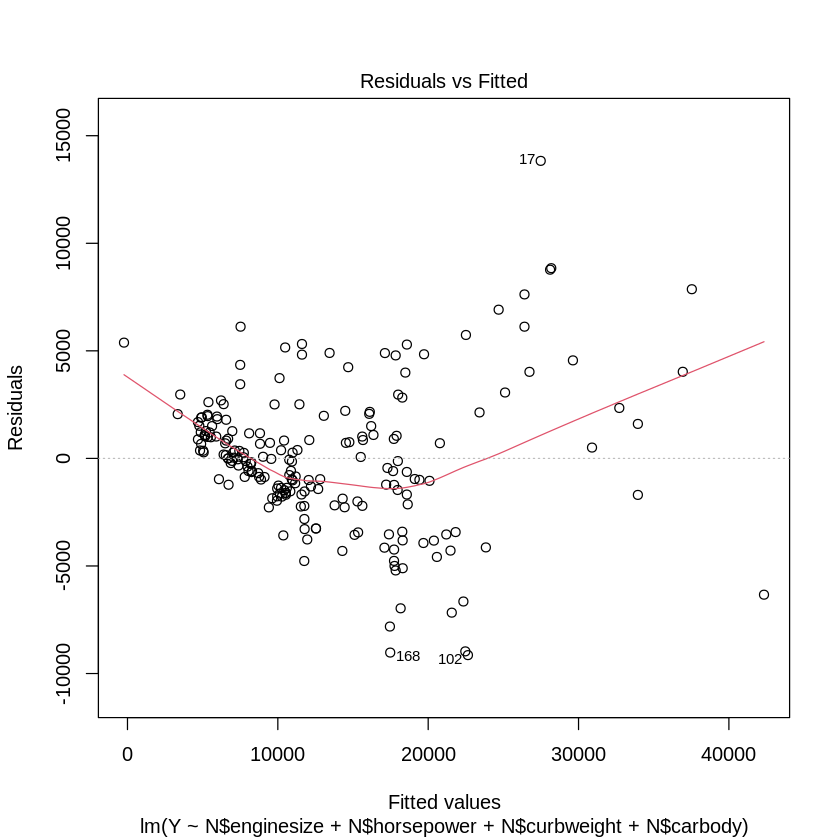

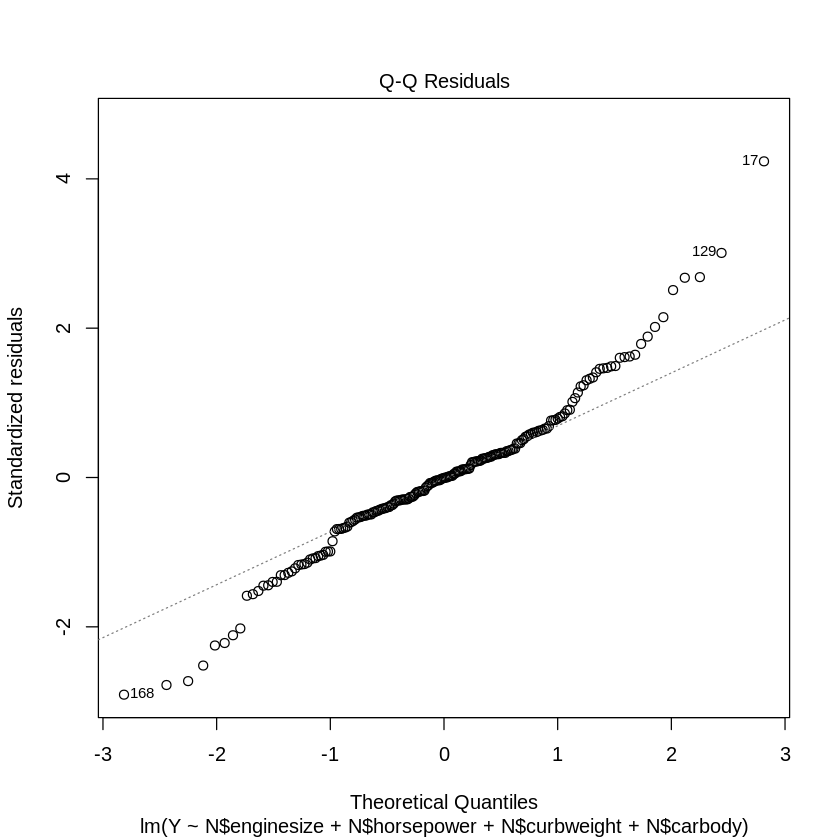

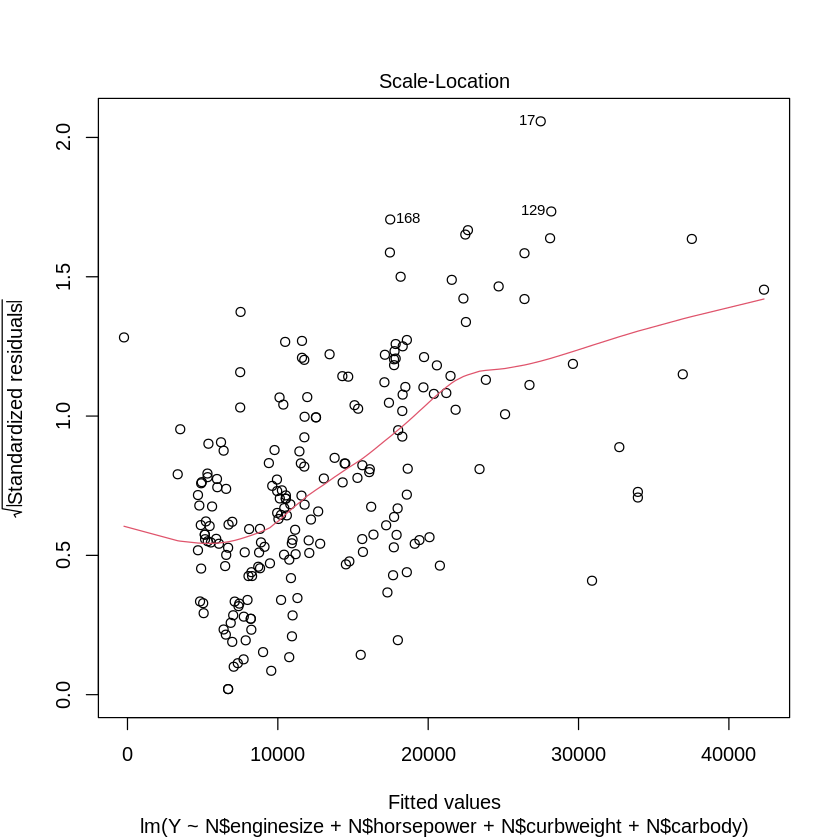

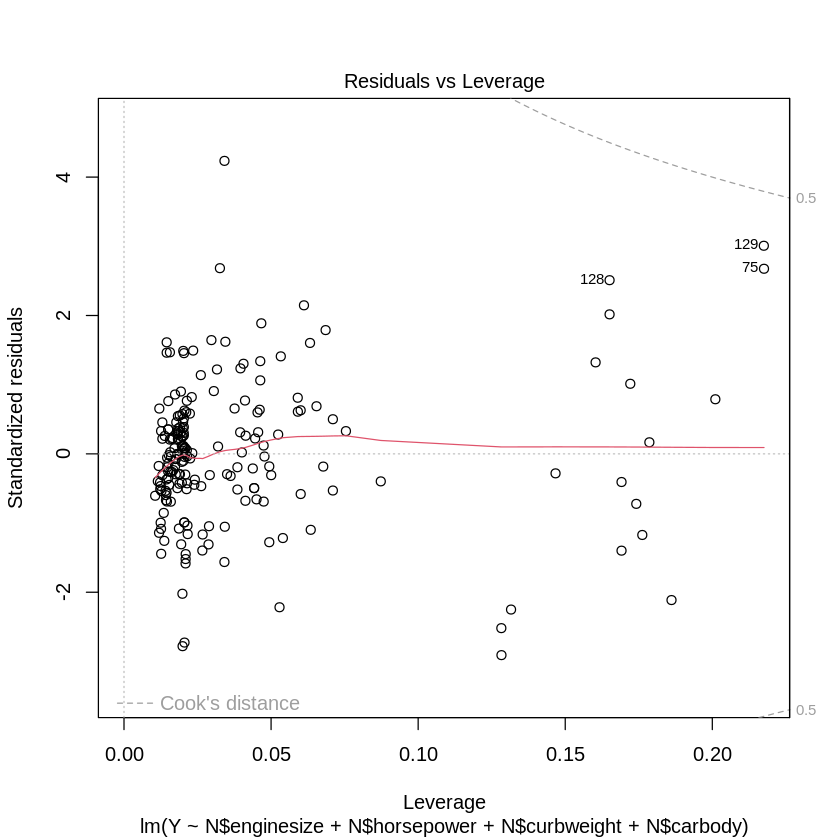

In [ ]:
plot(A)

## **Tercer modelo sin valores influyentes**
**Tercera entrega**

Finalmente, podemos tratar de encontrar un mejor modelo lineal, utilizando los datos sin normalizar y tambien quitando las variables influyentes. Para determinar que valores vamos a quitar usamos el siguiente código.

In [ ]:
summary(influence.measures(A))

Potentially influential observations of
	 lm(formula = Y ~ N$enginesize + N$horsepower + N$curbweight +      N$carbody) :

    dfb.1_  dfb.N$ng dfb.N$hr dfb.N$crbw dfb.N$crbdyhr dfb.N$crbdyht
1   -0.46    0.05     0.00    -0.02       0.46          0.61        
2   -0.13    0.01     0.00    -0.01       0.13          0.18        
17  -0.21    0.25     0.28    -0.18      -0.05          0.10        
18  -0.19    0.09     0.14    -0.01      -0.02          0.06        
50   0.09   -0.70    -0.19     0.55       0.11         -0.14        
70  -0.12   -0.08    -0.15     0.23       0.28          0.00        
73   0.17    0.09    -0.11     0.04      -0.28         -0.32        
74  -0.10    0.49    -0.20    -0.19      -0.05          0.09        
75  -0.17    0.84    -0.46    -0.27       0.62          0.14        
99  -0.02    0.02     0.01    -0.01      -0.07          0.01        
102  0.08   -0.11    -0.10     0.08       0.02         -0.04        
104  0.07   -0.13    -0.11     0.10       0.02   

Eliminamos los valores influyentes

In [ ]:
NI <- N[-c(1,2,17,18,50,70,73,74,75,99,102,104,127,128,129,130,156,168,169,171,173,190), ]
YI <- Y[-c(1,2,17,18,50,70,73,74,75,99,102,104,127,128,129,130,156,168,169,171,173,190)]
NI

,enginesize,horsepower,citympg,highwaympg,curbweight,carbody,fueltype,drivewheel
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
3,152,154,19,26,2823,hatchback,gas,rwd
4,109,102,24,30,2337,sedan,gas,fwd
5,136,115,18,22,2824,sedan,gas,4wd
6,136,110,19,25,2507,sedan,gas,fwd
7,136,110,19,25,2844,sedan,gas,fwd
8,136,110,19,25,2954,wagon,gas,fwd
9,131,140,17,20,3086,sedan,gas,fwd
10,131,160,16,22,3053,hatchback,gas,4wd
11,108,101,23,29,2395,sedan,gas,rwd


Y ahora hacemos el nuevo modelo lineal

In [ ]:
#Sin los datos influyentes
A = lm(YI~NI$enginesize+NI$horsepower+NI$curbweight+NI$carbody)
summary(A)


Call:
lm(formula = YI ~ NI$enginesize + NI$horsepower + NI$curbweight + 
    NI$carbody)

Residuals:
    Min      1Q  Median      3Q     Max 
-5794.9 -1482.2  -220.1  1252.3  7118.3 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.424e+04  1.034e+03 -13.767  < 2e-16 ***
NI$enginesize    3.094e+01  1.265e+01   2.446  0.01541 *  
NI$horsepower    3.024e+01  1.002e+01   3.017  0.00293 ** 
NI$curbweight    7.642e+00  8.996e-01   8.495  7.9e-15 ***
NI$carbodysedan  1.225e+03  4.247e+02   2.884  0.00442 ** 
NI$carbodywagon -1.278e+03  6.634e+02  -1.927  0.05558 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2478 on 177 degrees of freedom
Multiple R-squared:  0.8338,	Adjusted R-squared:  0.8291 
F-statistic: 177.6 on 5 and 177 DF,  p-value: < 2.2e-16


Podemos ver que es bastante mejor que el modelo anterior. Entonces podemos hacerle una verificación

Comenzamos con la prueba de normalidad


	Shapiro-Wilk normality test

data:  A$residuals
W = 0.97323, p-value = 0.001371


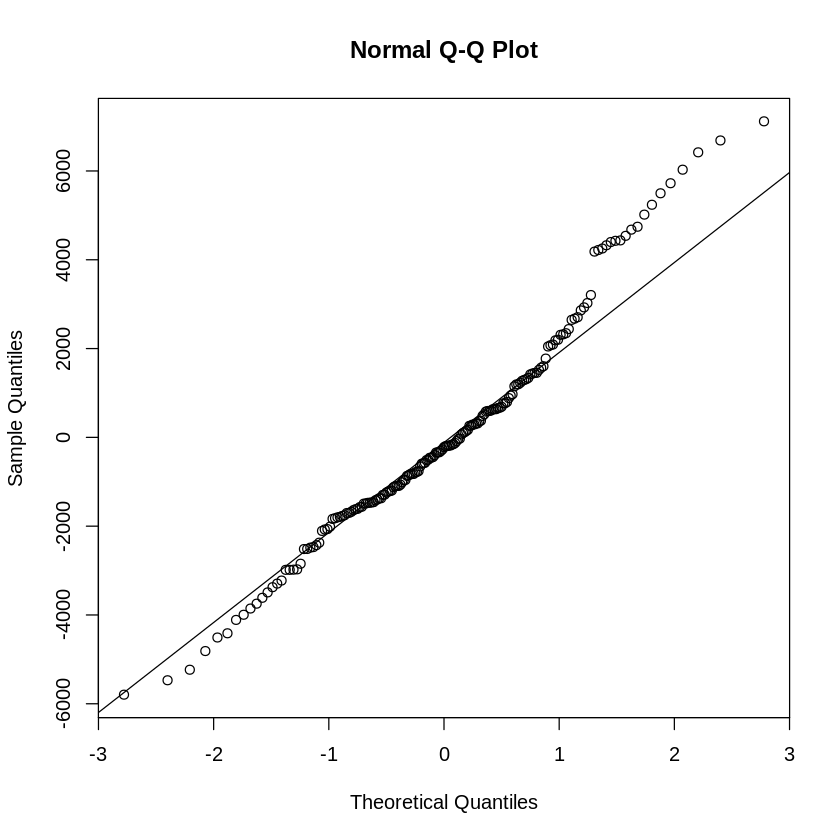

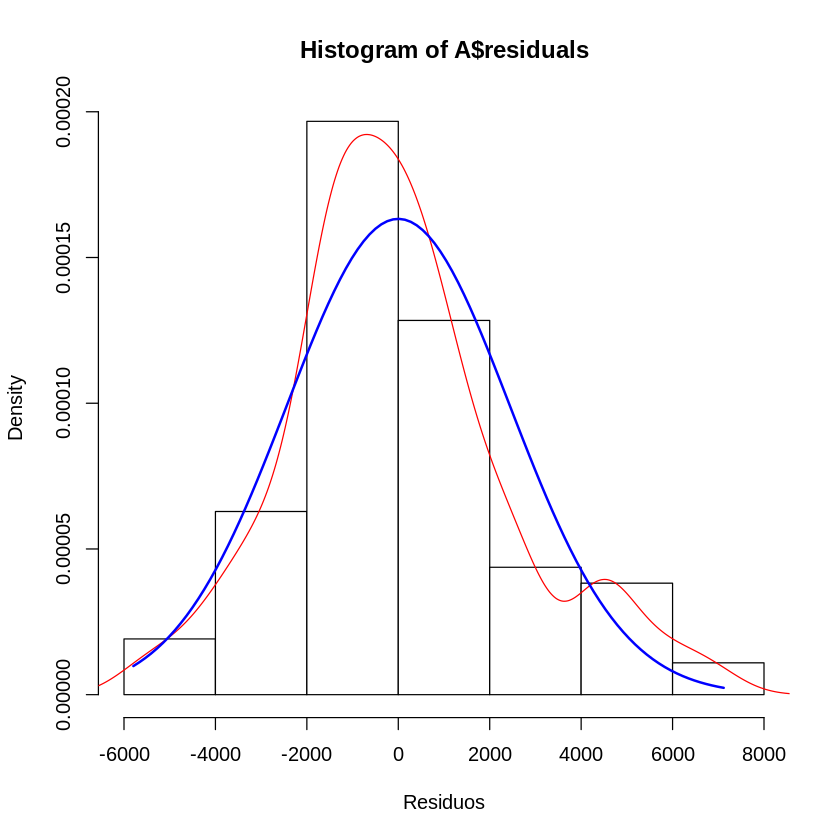

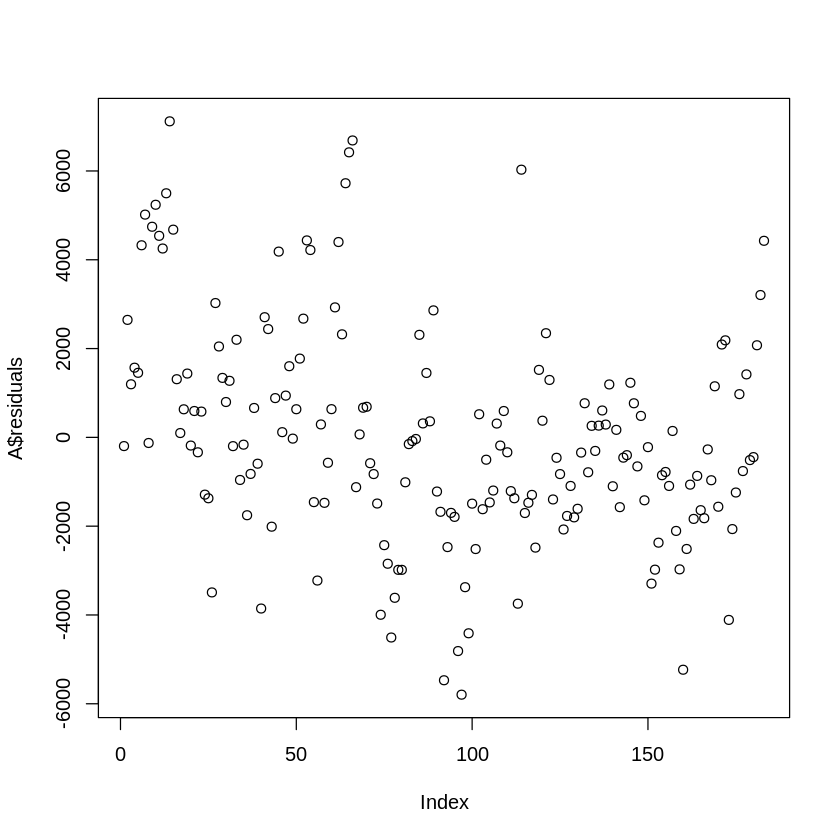

In [ ]:
#Prueba de normalidad

shapiro.test(A$residuals)

#Gráficas auxiliares:
qqnorm(A$residuals)
qqline(A$residuals)

hist(A$residuals,freq=FALSE, xlab="Residuos", col=0)
lines(density(A$residuals),col="red")
curve(dnorm(x,mean=mean(A$residuals),sd=sd(A$residuals)), from=min(A$residuals),to=max(A$residuals), add=TRUE, col="blue",lwd=2)

plot(A$residuals)

La prueba nos arroja estos resultados, podemos ver que en el QQ Plot tenemos la cola de arriba un poco pronunciada, pero la de abajo está muy cerca de la línea. En el segundo gráfico se ilustra que los datos son casi normales, ya que la línea roja es muy cercana a la azul (distribución ideal). Además los residuos de la tercera gráfica se encuentran muy esparcidos en toda la gráfica y no parece que tengan un comportamiento que nos indique que estamos obviando alguna variable.

In [ ]:
#Verificacion de media 0

t.test(A$residuals)


	One Sample t-test

data:  A$residuals
t = 1.3091e-16, df = 182, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -356.4227  356.4227
sample estimates:
   mean of x 
2.364836e-14 


El resultado del test para la t de student nos dice que la media no es 0, por lo tanto el resultado del modelo puede no se completamente confiable. Esto es lo mismo que veíamos arriba en las gráficas, donde hay una cola que está un poco más pronunciada.


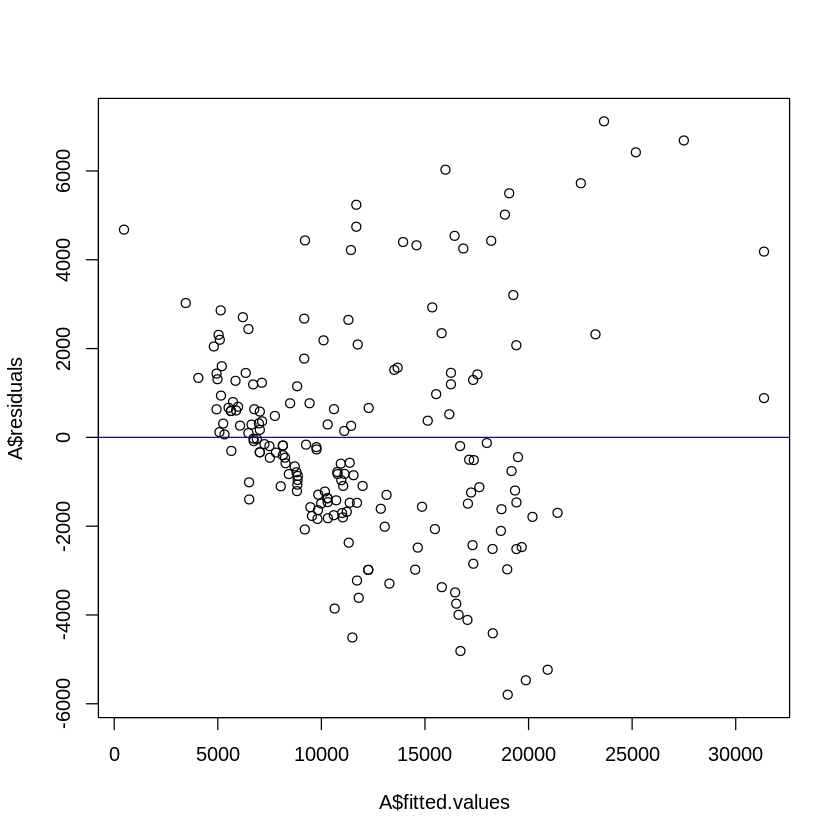

In [ ]:
#Homocedasticidad

plot(A$fitted.values,A$residuals)
abline(h=0, col="blue")

Viendo la gráfica podemos decir que los datos si presentan un comportamiento de homocedasticidad e independencia.
